## Business Question

### **How can we effectively predict the likelihood of car insurance claims based on the policyholders' characteristics and other relevant factors?** 

In the rapidly evolving insurance industry, understanding the factors influencing the likelihood of car insurance claims is crucial for companies to make data-driven decisions, minimize risk, and maximize profitability. By answering this question, we seek to uncover the key features that contribute to the occurrence of claims, enabling insurance companies to design personalized and competitive products, manage their portfolios more effectively, and reduce claim-related costs.

To achieve this goal, we have collected a comprehensive dataset containing a wide range of variables related to policyholders, vehicles, and historical claims. This dataset offers a unique opportunity to explore the complex relationships between these features and insurance claims, and develop a robust model to predict the likelihood of future claims. In this study, we will apply various feature selection techniques, data preprocessing methods, and machine learning algorithms, including deep learning models, to develop an accurate and reliable prediction model, which will be rigorously evaluated using performance metrics such as F1 score, accuracy, precision, ROC-AUC score, and recall.

It is important to consider the context of an insurance car company when interpreting these results, as by predicting the likelihood of a claim, we can take proactive measures to mitigate the risk and minimize the potential losses. For example, if our model predicts a high likelihood of a claim, we can increase the premium or set a higher deductible to reduce the potential payout. On the other hand, if the model predicts a low likelihood of a claim, we can offer competitive prices to attract more customers while maintaining our profitability. In this context, optimizing the recall metric is particularly important, as it measures the model's ability to correctly identify true positive claims. A high recall score ensures that the insurance company is accurately identifying the majority of actual claims, thereby reducing the risk of unexpected payouts and enabling better resource allocation for claims investigation and fraud detection.

By the end of this study, we aim to provide insurance companies with a reliable tool to predict car insurance claims, enabling them to make informed decisions, optimize business processes, and ultimately, increase their competitive edge in the market. Additionally, our findings will offer valuable insights into the factors influencing claims, helping insurance companies to better understand their customer base and design tailored strategies to improve customer satisfaction and retention. By focusing on optimizing recall as our primary metric, we aim to deliver a model that effectively balances the need for accurate claims identification with the financial implications of missed claims, ultimately benefiting both the insurance company and its customers.

## Table of Contents
* [Exploratory Data Analysis ](##Exploratory-Data-Analysis)
* [Feature Selection](##Feature-Selection)
* [Logistic regression](##-Logistic-regression)
* [Decision Trees](##Decision-Trees)
* [Random Forest](##Random-Forest)
* [XGBoost](##XGBoost)
* [Deep Learning model - MLPClassifier](##Deep-Learning-model---MLPClassifier)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, cohen_kappa_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.neural_network._base import ACTIVATIONS, DERIVATIVES, LOSS_FUNCTIONS
from sklearn.utils import shuffle, gen_batches, check_random_state, _safe_indexing 
from sklearn.exceptions import ConvergenceWarning

# Exploratory Data Analysis



Exploratory Data Analysis (EDA) is an essential step in understanding and gaining insights from our dataset before conducting further analysis and modeling machine learning algorithms. It involves examining and visualizing the data to identify patterns, relationships, and anomalies. EDA helps uncover potential problems, validate assumptions, and generate hypotheses. To explore our dataset, we will perform the following steps:

**Data Cleaning**
- Data cleaning is an essential step in the data analysis process as it ensures that the dataset is accurate, consistent, and suitable for analysis. It involves various operations such as handling missing values, removing duplicates, and addressing data inconsistencies or errors. By cleaning the data, potential issues and biases can be identified and resolved, which helps to prevent misleading or inaccurate results. The process of data cleaning improves the overall quality of the dataset, making it more reliable for subsequent analysis and decision-making.


**Univariate Analysis:**
- Univariate analysis is a method that centers on comprehending the distribution, summary statistics, and properties of individual variables in isolation. This analysis entails using visualizations such as histograms, box plots, and descriptive statistics like mean, median, and variance. By performing univariate analysis, one can detect outliers, assess skewness, and observe other patterns within each variable. Ultimately, this approach offers an initial understanding of the characteristics of the variables under examination.


**Bivariate Analysis:**
- Bivariate analysis is a methodology used to examine the relationship between two variables. It enables a deeper understanding of how variables interact or influence each other and helps identify potential associations. This analysis involves employing techniques such as scatter plots, correlation analysis, and cross-tabulations. By conducting bivariate analysis, one gains insights into the dependencies, correlations, or trends that exist between pairs of variables, revealing valuable information about their interrelationship.


**Multivariate Analysis:**
- Multivariate analysis expands the exploration to multiple variables simultaneously, going beyond the examination of individual variables or pairs of variables. It delves into complex relationships and interactions among three or more variables. To conduct multivariate analysis, various techniques can be employed, including heatmaps, parallel coordinate plots, or dimensionality reduction methods like Principal Component Analysis (PCA). Through multivariate analysis, patterns, clusters, or groups of variables that may impact the overall analysis can be identified. This approach allows for a comprehensive understanding of the interdependencies and combined effects of multiple variables in a dataset.

In [55]:
# read data file
dataset = pd.read_csv('ml_gw_car_insurance.csv')
dataset.head()

,Unnamed: 0,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
1,1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
2,2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,...,No,No,No,Yes,No,No,No,Yes,0,0.0
3,3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


### Data Cleaning

For cleaning our data we build a function that performs the following tasks:
- Transforming Yes and No values into Booleans:
    - Replaces "No" with 0 and "Yes" with 1.
- Removal of policy_id column:
    - Drops the "policy_id" column from the dataset.
- Only considering rows where target variable is not NaN:
    - Filters the dataset to include only rows where the "is_claim" column has values of 1 or 0.
- Extracting torque and power values:
    - Extracts numeric values from the "max_torque" column and creates new columns for "torque_Nm" and "torque_rpm".
    - Extracts numeric values from the "max_power" column and creates new columns for "power_bhp" and "power_rpm".
- Dropping unnecessary columns:
    - Removes the "max_torque" and "max_power" columns from the dataset.
- Returns the modified dataset after performing the cleaning and transformation steps.

In [3]:
def data_cleaning(dataset):
    
    #Removal of policy_id column
    dataset = dataset.drop(columns = {"policy_id", 'Unnamed: 0'})

    # only considering rows where target variable is not nan
    dataset = dataset[(dataset.is_claim == 1) | (dataset.is_claim == 0)]

    # Prepare torque and power columns
    dataset['torque_Nm'] = dataset['max_torque'].str.extract('(\d+)').astype(float)
    dataset['torque_rpm'] = dataset['max_torque'].str.extract('@(\d+)').astype(float)
    dataset['power_bhp'] = dataset['max_power'].str.extract('(\d+.\d+)').astype(float)
    dataset['power_rpm'] = dataset['max_power'].str.extract('@(\d+)').astype(float)

    dataset.drop(columns = {'max_torque','max_power'}, inplace=True)
    
    return dataset

In [56]:
dataset = data_cleaning(dataset)
dataset.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,2,0.0,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,No,Yes,Yes,Yes,2,0.0,91.0,4250.0,67.06,5500.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  object 
 12  is_a

### Univariate Analysis

During the univariate analysis, we performed the following steps:

**Data Type Conversion:**
- This conversion is done to treat these columns as categorical variables during analysis.

**Categorical Variable Analysis:**
- For each categorical variable, a bar plot is generated to visualize the frequency distribution of each category.
- This analysis helps understand the distribution of individual categorical variables.

**Numerical Variable Analysis:**
- For chosen numerical variable, a distribution plot is created to visualize its distribution.
- This analysis provides insights into the distribution patterns of individual numerical variables.

**Target Variable Analysis:**
- For the target variable, a bar plot will be generated to visualize the frequency distribution.
- This analysis helps to understand any imbalance we might have in our dataset. 

In [6]:
# transform columns to type object
dataset['airbags'] = dataset['airbags'].astype('object')
dataset['cylinder'] = dataset['cylinder'].astype('object')
dataset['gear_box'] = dataset['gear_box'].astype('object')
dataset['ncap_rating'] = dataset['ncap_rating'].astype('object')
dataset['torque_Nm'] = dataset['torque_Nm'].astype('object')
dataset['torque_rpm'] = dataset['torque_rpm'].astype('object')
dataset['power_bhp'] = dataset['power_bhp'].astype('object')
dataset['power_rpm'] = dataset['power_rpm'].astype('object')
dataset['turning_radius'] = dataset['turning_radius'].astype('object')
dataset['length'] = dataset['length'].astype('object')
dataset['width'] = dataset['width'].astype('object')
dataset['height'] = dataset['height'].astype('object')
dataset['gross_weight'] = dataset['gross_weight'].astype('object')
dataset['make'] = dataset['make'].astype('object')
dataset['displacement'] = dataset['displacement'].astype('object')

# categorical and numerical variables
cat = dataset.select_dtypes(include=object).columns
num = dataset.select_dtypes(include=np.number).columns

#### Categorical Variables

We're generating bar plots to visualize the frequency distribution of each categorical variable. By analyzing the frequency distribution, we can **identify categorical variables that have imbalanced or skewed distributions**. Imbalanced variables may lead to biased model performance or hinder the learning process of machine learning algorithms. Visualizing the distributions helps in identifying such variables and deciding whether to include, exclude, or handle them differently during the feature selection process.

Furthermore, categorical variables with a large number of unique categories or with categories that **occur infrequently may need to be transformed or grouped to reduce dimensionality and improve model performance**. By visualizing the frequency distribution, we can identify such variables and make informed decisions on how to handle them during feature engineering.

Additionally, they often require encoding or transformation into numerical representations before they can be used as input to machine learning models. Understanding the distribution of categories **helps in deciding the appropriate encoding technique, such as one-hot encoding or ordinal encoding,** to ensure the model can effectively interpret the categorical data.

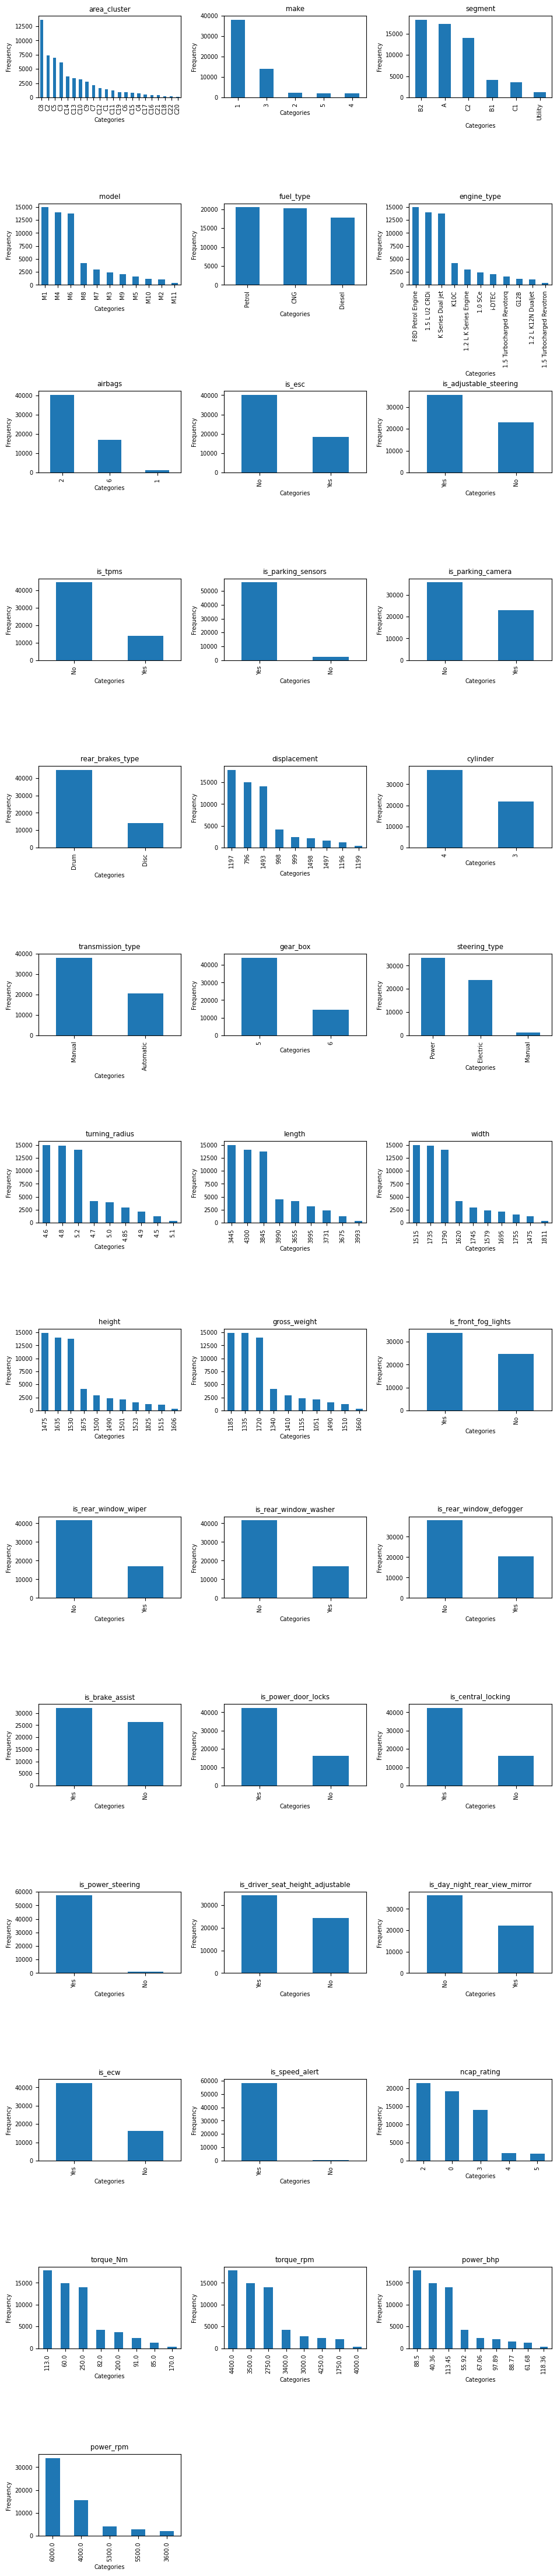

In [7]:
plt.rcParams.update({'font.size': 7})
rows = 14
columns = 3
iterator=1

for i in  cat:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    dataset[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**We come to the following conclusions:**

As the distribution of the following variables looks fine to use in our model, we will **include** them:
- Segment
- Fuel_type
- Is_esc
- Is_adjustable_steering
- Is_front_fog_lights
- Is_rear_window_wiper
- Is_rear_window_washer
- Is_rear_window_defogger
- Is_brake_assist
- Is_power_door_locks
- Is_central_locking
- Is_driver_seat_height_adjustable
- Is_day_night_rear_view_mirror
- Is_ecw
- Is_tpms
- Is_parking_camera
- Rear_brakes_type
- Cylinder
- Transmission_type

These variables could be considered imbalanced. However, some categories of these variables might still be relevant to our model (this needs to be determined via transforming the data (e.g. get_dummies)). Going further, we will **provisionally include** them:
- Area_cluster
- Make
- Model
- Engine_type
- Turning_radius
- Length
- Width
- Height
- Gross_weight
- Torque and Power columns
- Gear_box
- Steering_type
- Displacement

The following variables are imbalanced and don't seem relevant for answering our business question, which is why we decided to **exclude** them going forward:
- Airbags
- Is_parking_sensors
- Is_power_steering
- Is_speed_alert
- Ncap_rating

None of our features have a large number of unique categories, but some categories occur infrequently (see above list). Those **should be transformed before using them** in our machine learning model, as the transformation might lead to better results.

#### Numerical Variables

We're generating distribution plots to visualize the shape, range, and spread of a variable's values. It provides insights into whether the data is normally distributed, skewed, or has other distribution patterns.

Analyzing the distribution of variables can guide feature engineering decisions. For example, if a variable exhibits a non-linear or skewed distribution, transforming it (e.g., **applying logarithmic or power transformations**) can help improve its suitability for certain models or capture non-linear relationships.

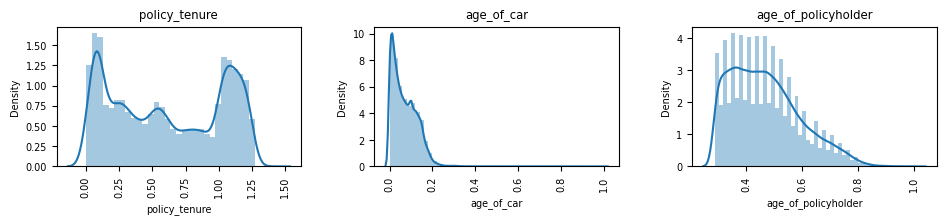

In [8]:
plt.rcParams.update({'font.size': 7})
n = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

rows = 14
columns = 3
iterator=1

for i in n:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    sns.distplot(dataset[i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

- Policy_tenure: The distribution of policy_tenure looks good, which makes it fine to **include** in our model.
- Age_of_car: This variable is highly skewed. As the age of a car has a high impact on our car insurance claim predictions, we need to **powertransform it first before using it** in our model.
- Age_of_policyholder: This variable is skewed as well. As the age of the policy holder has a high impact on our car insurance claim predictions, we need to **powertransform it first before using it** in our model.

In [9]:
print(dataset.age_of_car.skew())
print(dataset.age_of_policyholder.skew())

1.0940812262542075
0.6400493147434646


**The columns age_of_car and age_of_policyholder are extremely skewed. Before using them in our model, we need to transform them.**

One of the most important columns is our target variable is_claim. Let's have a deeper look at that.

#### Target variables


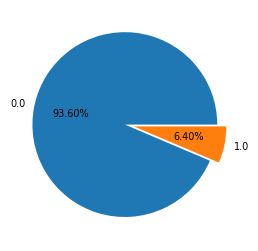

In [10]:
# Create the figure with desired size
plt.figure(figsize=(3, 3))

# Create the pie chart
plt.pie(dataset.is_claim.value_counts(), labels=dataset.is_claim.value_counts().index.tolist(), autopct='%1.2f%%', explode=[0.05]*2)

# Display the pie chart
plt.show()


**Our target variable, is_claim, is extremely imbalanced**. This unbalanced distribution can have a significant impact on the performance of models trained on our data. If we train a classifier on this dataset without accounting for the class imbalance, it **may be biased towards the majority class** and perform poorly on the minority class.Thus, we need to consider one of the following options:

- **Class weight balancing**: Assigning weights to different classes during model training can help to compensate for class imbalance. Many machine learning algorithms have an option to specify class weights, giving more importance to the minority class.
- **Oversampling**: Increase the number of instances in the minority class by randomly duplicating existing instances or generating synthetic samples. This can be done using techniques such as Random Oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or ADASYN (Adaptive Synthetic Sampling).
- **Different performance metrics**: Accuracy alone may not be an appropriate evaluation metric for imbalanced classes. Consider using metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve, which provide a more comprehensive evaluation of model performance on imbalanced data.
- **Algorithm selection**: Some algorithms are more robust to imbalanced classes than others. Algorithms like Random Forests, Gradient Boosting, or Support Vector Machines tend to handle class imbalance better than simple linear models like Logistic Regression.

In [11]:
# Calculating class weight
print(f'For building our model, we should use the following class weight: {round(93.6/6.4, 0)}')

For building our model, we should use the following class weight: 15.0


### Bivariate Analysis

During our bivariate analysis we explore the relationship between our target variable is_claim and each of the variables listed in the bva list. Bivariate analysis focuses on examining the relationship between two variables, in this case, the target variable and each independent variable.

We're creating a contingency table, also known as a cross-tabulation, between the target variable is_claim and each independent variable in bva. This table provides a count of the occurrences of different combinations of the two variables. For each cross-tabulation, we're using a bar plot that represents a different category or level of the independent variable, and the height of the bar indicates the count of occurrences in each category. This visualization helps to compare the distribution of the target variable across different levels of the independent variables.

By analyzing these bivariate relationships through bar plots, you can gain insights into how each independent variable may influence the target variable, identify patterns or associations, and assess the potential predictive power of the variables for the target variable.

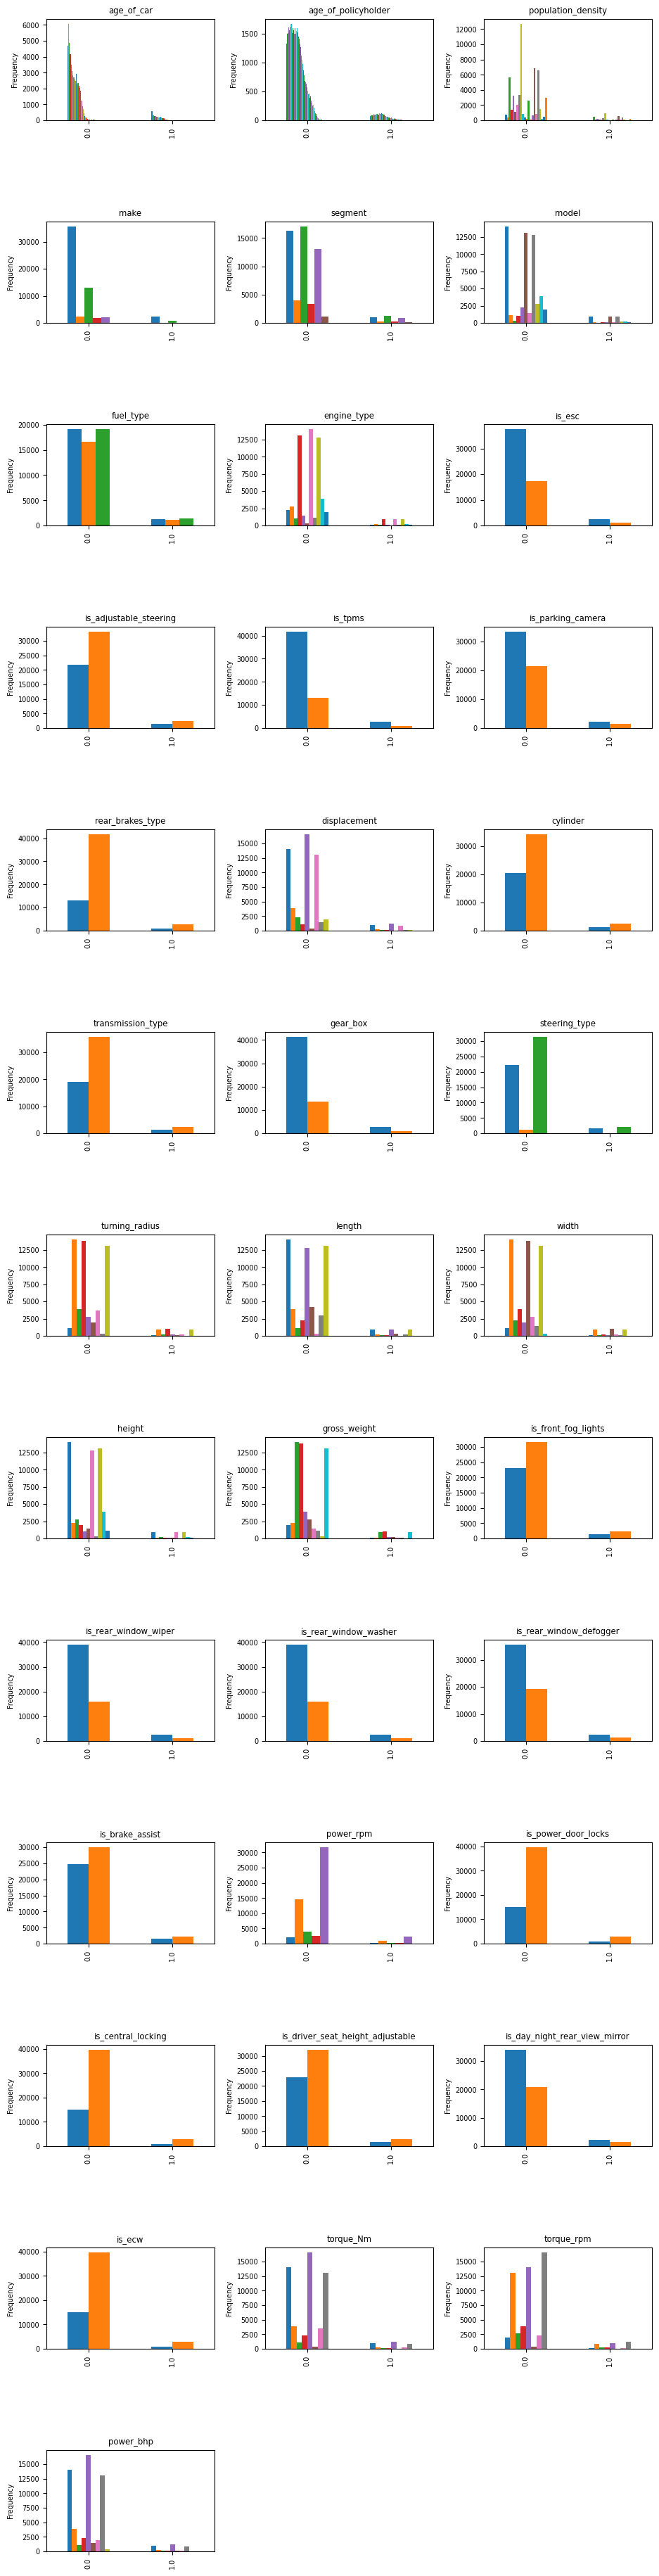

In [12]:
plt.rcParams.update({'font.size': 7})

bva = ['age_of_car', 'age_of_policyholder', 'population_density', 'make', 
       'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 
       'is_tpms', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 
       'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'power_rpm',
       'is_power_door_locks', 'is_central_locking', 'is_driver_seat_height_adjustable', 
       'is_day_night_rear_view_mirror', 'is_ecw', 'torque_Nm', 'torque_rpm', 'power_bhp']

num_features = len(bva)
rows = (num_features + 2) // 3  # Calculate the number of rows based on the number of features
columns = 3
iterator = 1

fig, axes = plt.subplots(rows, columns, figsize=(6.5, 4))

plt.subplots_adjust(left=None, bottom=1, right=1.45, top=10, wspace=0.3, hspace=1)

for i, feature in enumerate(bva):
    row = i // columns
    col = i % columns
    ax = axes[row, col]
    pd.crosstab(dataset.is_claim, dataset[feature]).plot(kind='bar', ax=ax, legend=False)
    ax.set_title(feature)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('')  # Remove x-label for better readability
    ax.tick_params(axis='x', rotation=90)

# Remove empty subplots if there are any
if num_features < rows * columns:
    for i in range(num_features, rows * columns):
        row = i // columns
        col = i % columns
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


As we dive into the bivariate analysis, it's important to **keep in mind that our target variable is highly imbalanced**, as we observed in the previous univariate analysis. This imbalance can have an impact on the relationships we explore between predictor variables and the target variable.

To ensure a more meaningful analysis, we have excluded features that were found to be highly imbalanced and deemed irrelevant for our machine learning model. By doing so, we can focus on the remaining variables that hold potential for predictive power.

Let's take a closer look at the plots above. We can observe that certain variables, such as age_of_car and age_of_policyholder (both after power transformation), fuel_type, population_density, and is_brake_assist, exhibit a **relatively balanced distribution within our imbalanced dataset**. These variables are promising candidates for inclusion in our model, as their distributions align well with our target variable.

On the other hand, some variables, like is_tpms, display a noticeable imbalance. This indicates that they may not contribute significantly to our model's performance or could introduce bias. It's crucial to consider whether these imbalanced variables should be **either excluded from the model or transformed appropriately to address the imbalance**.

By carefully assessing the balance and relevance of the variables in our bivariate analysis, we can make informed decisions about feature selection and preprocessing techniques to enhance the effectiveness of our machine learning model.

### Multivariate Analysis

The advantage of multivariate analysis is that it allows for the simultaneous examination of multiple variables, providing a more comprehensive understanding of relationships and patterns in the data. By considering multiple variables together, multivariate analysis can uncover hidden associations and dependencies that may not be apparent in univariate or bivariate analysis.

One commonly used technique in multivariate analysis is the heatmap. Heatmaps are particularly useful for visualizing the relationships between multiple variables in a tabular format. Heatmaps can display the correlation matrix, which shows the pairwise correlations between multiple variables. By using color intensity, heatmaps allow for quick and intuitive identification of strong positive or negative correlations. Furthermore, they can help identify important features or variables that are strongly correlated with the target variable. By examining the color intensity or correlation values, one can prioritize variables for further analysis or modeling.

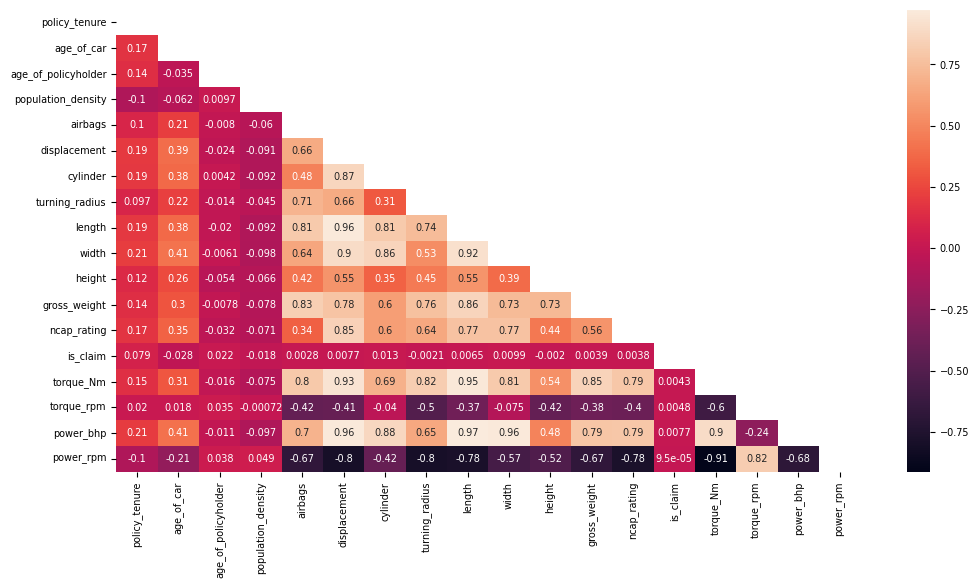

In [13]:
# transform columns to previous integer type 
dataset['airbags'] = dataset['airbags'].astype('int')
dataset['cylinder'] = dataset['cylinder'].astype('int')
#dataset['gear_box'] = dataset['gear_box'].astype('int') #leaving it out for transformation
dataset['ncap_rating'] = dataset['ncap_rating'].astype('int')
dataset['torque_Nm'] = dataset['torque_Nm'].astype('int')
dataset['torque_rpm'] = dataset['torque_rpm'].astype('int')
dataset['power_bhp'] = dataset['power_bhp'].astype('int')
dataset['power_rpm'] = dataset['power_rpm'].astype('int')
dataset['turning_radius'] = dataset['turning_radius'].astype('int')
dataset['length'] = dataset['length'].astype('int')
dataset['width'] = dataset['width'].astype('int')
dataset['height'] = dataset['height'].astype('int')
dataset['gross_weight'] = dataset['gross_weight'].astype('int')
#dataset['make'] = dataset['make'].astype('int') #leaving it out for transformation
dataset['displacement'] = dataset['displacement'].astype('int')

# correlation matrix
corr = dataset.corr()

# creating a mask to only show lower half of heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# plotting heatmap
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, mask = mask);

Our target variable doesn't seem to have a high correlation between any of the other variables. This suggests that **there isn't a strong linear relationships between the target variable and the predictor variables** in our dataset (the highest variables being policy_tenure, age_of_car, and age_of_policyholder). In such cases, it is important to consider other factors and techniques for modeling and analysis. Here are two approaches we will consider:
- Nonlinear relationships!
- Ensemble methods: Ensemble methods, such as random forests or gradient boosting, are robust to low or no linear correlations between variables. These methods can capture complex interactions and non-linear relationships, allowing for accurate predictions even when linear correlations are weak.

It's important to note that correlation is just one measure of the relationship between variables, and there may be other meaningful associations or dependencies that are not captured by correlation alone. Therefore, it's crucial to approach the analysis from multiple perspectives and consider various techniques to uncover the underlying patterns and relationships in our data.

This is why we're going to try mutual information, which is a measure of the general dependence between variables. These measures can help identify features that have a strong association or information content with the target variable. By using mutual information, we can assess the dependency or information content of each feature with respect to the target variable, helping us in the feature selection process.

In [14]:
#Transforming Yes and No values into Booleans
#dataset = dataset.replace({ "No" : 0 , "Yes" : 1 })

# Set X and y values
X = dataset[['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'torque_Nm', 'torque_rpm',
       'power_bhp', 'power_rpm']]
y = dataset['is_claim']

# Compute mutual information between X and y
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame to store the mutual information scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information scores in descending order
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores[1:12]


,Feature,Mutual Information
0,policy_tenure,0.003077
16,power_bhp,0.002977
7,cylinder,0.002714
5,airbags,0.002048
17,power_rpm,0.001864
13,gross_weight,0.001272
3,population_density,0.000672
15,torque_rpm,0.000413
6,displacement,0.000000
4,make,0.000000


These are the top 10 features with the highest mutual information as our target variable is_claim. Age_of_policyholder and policy_tenure are a part of the top 10 alongside 8 other variables.

## Concluding our EDA

In this section, we will add all insights from our EDA and transform necessary columns. Lets start by adding insights from the univariate analysis:

We will drop the columns 'is_parking_sensors', 'is_power_steering', 'is_speed_alert', 'ncap_rating', and 'airbags'.
Regarding the columns 'area_cluster', 'model', 'engine_type', 'gear_box', 'steering_type' etc., which we provisionally included, we could use dummies in our feature selection to see whether all categories within each column are useful for our model.

In [15]:
# Drop unnecessary columns
dataset = dataset.drop(columns={'is_parking_sensors', 'is_power_steering', 'is_speed_alert', 'ncap_rating', 'airbags'})
dataset.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,No,No,No,No,0.0,60,3500,40,6000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,0.0,113,4400,88,6000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,0.0,91,4250,67,5500


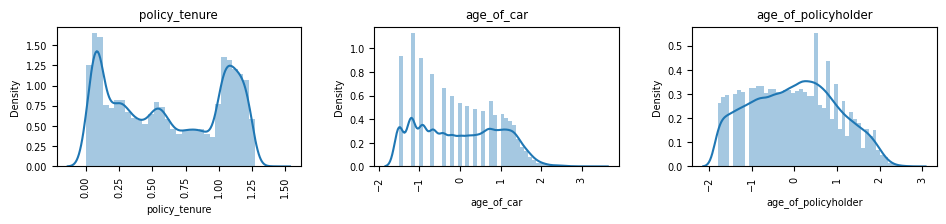

In [16]:
# Powertransform relevant columns
pt = PowerTransformer(method='yeo-johnson')
dataset.loc[:,['age_of_car','age_of_policyholder']] = pt.fit_transform(pd.DataFrame(dataset.loc[:,['age_of_car','age_of_policyholder']]))

# Plot columns
plt.rcParams.update({'font.size': 7})
n = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

rows = 14
columns = 3
iterator=1

for i in n:
    plt.subplots_adjust(left=None, bottom=1, right=1.5, top=10, wspace=0.3, hspace=1.3)
    plt.subplot(rows,columns,iterator)
    sns.distplot(dataset[i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

In [17]:
print(dataset.age_of_car.skew())
print(dataset.age_of_policyholder.skew())

0.12448809341883195
0.06434844532848479


Through Sklearn's PowerTransformer, we were able to preprocess the two important variables age_of_car and age_of_policyholder towards a far less skewed and imbalanced variable and can **now use them in our model**.

Now let's transform our categorical columns to see with features we should select.

In [18]:
# Transform area cluster and engine type to float without dummies
cluster_freq=dataset['area_cluster'].value_counts(normalize=True).to_dict()
dataset['area_cluster'] = dataset['area_cluster'].map(cluster_freq)

engine_freq=dataset['engine_type'].value_counts(normalize=True).to_dict()
dataset['engine_type'] = dataset['engine_type'].map(engine_freq)

In [19]:
# Get dummies for categorical 
dataset = pd.get_dummies(data = dataset, columns=['make', 'segment', 'model', 'fuel_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'gear_box', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_ecw'], drop_first=True)

dataset

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,engine_type,displacement,cylinder,turning_radius,length,...,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes
0,0.515874,-0.200500,1.354890,0.025055,4990,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
1,0.672619,-0.923772,-0.748659,0.125307,27003,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
2,0.841110,-0.923772,-0.646150,0.104127,4076,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
3,0.900277,0.862825,-0.171140,0.011350,21622,0.018433,1197,4,4,3995,...,1,0,0,1,1,1,1,1,1,1
4,0.596403,0.862825,1.300866,0.119112,34738,0.040500,999,3,5,3731,...,0,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,1.132040,1.354890,0.233035,8794,0.040500,999,3,5,3731,...,0,0,0,0,0,1,1,0,1,1
58588,1.199642,-0.923772,0.548946,0.062466,7788,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
58589,1.162273,-0.200500,0.002782,0.119112,34738,0.255120,796,3,4,3445,...,0,0,0,0,0,0,0,0,0,0
58590,1.236307,1.254005,0.822720,0.233035,8794,0.235117,1197,4,4,3845,...,1,0,0,0,1,1,1,1,1,1


As we have seen in our EDA, we have a clear minority class. When the class distribution is imbalanced, meaning one class is significantly underrepresented compared to the other(s), the learning algorithm may have difficulty properly recognizing and predicting the minority class. 

In such cases, oversampling techniques like SMOTE can help address the class imbalance by generating synthetic samples for the minority class. SMOTE works by creating synthetic examples along the line segments connecting neighboring instances of the minority class. This helps to increase the number of minority class samples in the training set, providing more representative and balanced data for the learning algorithm.

When using oversampling techniques like SMOTE, it's generally recommended to perform the oversampling only on the training set, and not on the entire dataset including the test set. The reason for this is to ensure that the test set remains an unbiased representation of real-world data. If we oversample the minority class in the entire dataset, it can introduce synthetic samples that are very similar to existing minority class samples, potentially causing information leakage from the training set to the test set. This can lead to overly optimistic performance estimates and inaccurate evaluation of our model's generalization ability.

Therefore, on order to account for our imbalance, **we're using the oversampling technique SMOTE only on our train set**.

In [20]:
# Create X and y 
x = dataset.drop('is_claim',axis=1)
y = dataset['is_claim']

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [21]:
smt = SMOTE(random_state = 42, sampling_strategy = 0.30)

x_train, y_train =  smt.fit_resample(x_train, y_train)

x_train.shape, y_train.shape

((57045, 57), (57045,))

SMOTE (Synthetic Minority Over-sampling Technique) can be a suitable choice for oversampling when dealing with imbalanced datasets under certain characteristics:

- Relatively small dataset: If you have a limited amount of data, applying SMOTE can help increase the number of samples in the minority class, providing a more balanced training set and potentially improving model performance.

- Continuous or numerical data: SMOTE works well with continuous or numerical features. It creates synthetic examples by interpolating between existing minority class samples, which is easier to achieve in a continuous feature space.

- Noisy data or outliers: SMOTE can be effective in handling noisy data or outliers within the minority class. By generating synthetic samples, SMOTE can help fill in gaps or areas where the minority class might be sparsely represented.

As these characteristics are given, we are of the opinion that **SMOTE is the best oversampling method in our specific situation.**

Now let's use our prepared and processed dataset to find the best features to use.


## Feature Selection



When dealing with datasets that contain numerous features, it becomes **crucial to select the most relevant and informative variables** for the machine learning model. Feature selection plays a vital role in improving model performance, reducing overfitting, and enhancing interpretability. Too solve our business question, we will explore a practical approach to feature selection by **employing the logistic regression algorithm**, a versatile and widely used method in the field of classification. By utilizing logistic regression as a feature selector, we can identify the most informative variables and construct a more interpretable and accurate model. This approach not only enhances prediction performance but also provides valuable insights into the underlying relationships between the features and the target variable.

In [22]:
# Compute mutual information between X and y
mutual_info = mutual_info_regression(x_train, y_train)

# Create a DataFrame to store the mutual information scores
mi_scores = pd.DataFrame({'Feature': x_train.columns, 'Mutual Information': mutual_info})

# Sort the DataFrame by mutual information scores in descending order
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
mi_scores.head(20)

,Feature,Mutual Information
2,age_of_policyholder,0.293887
1,age_of_car,0.245881
0,policy_tenure,0.025690
5,engine_type,0.011716
9,length,0.011520
10,width,0.010501
3,area_cluster,0.010177
6,displacement,0.009010
11,height,0.008529
54,is_driver_seat_height_adjustable_Yes,0.007055


# Machine Learning Models


## Logistic regression


Logistic regression is a widely used method for binary classification problems. It is often preferred over other classifiers like decision trees, random forests, and SVMs when the relationship between the independent variables and the dependent variable is non-linear. However, logistic regression may not always be the best option for classification problems with imbalanced classes and a large number of features, as it has some limitations.

One major issue with logistic regression in the case of imbalanced data is that it may have a bias towards the majority class, resulting in poor performance in predicting the minority class. Another issue with logistic regression in this scenario is the curse of dimensionality, which refers to the challenge of estimating the model's parameters when the number of predictors is high compared to the sample size. This can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data. To mitigate this, feature selection techniques such as Lasso or Ridge regression, which can help identify and remove redundant or irrelevant features, can be used.

Despite these challenges, logistic regression may still be a good option in some cases. For example, when the relationships between the independent variables and the dependent variable are linear, and there is no need for complex interactions or non-linearities, logistic regression can provide a simple and interpretable model that is easy to implement and understand. Additionally, logistic regression is well-suited for situations where the goal is not only prediction but also the interpretation of the coefficients and their impact on the dependent variable.

This section performs logistic regression on the dataset to predict the binary variable 'is_claim'. Four different methods for feature selection will be considered, namely:  
1. All Variables 
2. Linear correlation: The 10 features with the highest (absolute) linear correlation will be used in this regression 
3. Lasso regression: Lasso regression is performed first to locate which features contribute significantly  
4. PCA: The features will be transformed with PCA, and the optimal number of components, which is found using a threshold of 90% explained variance, and then logistic regression is performed 

### All variables

In [23]:
X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

# Fit the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

results = cross_validate(logreg, X_train, y_train, cv=5, scoring='f1')

print('F1 Score:', f1_score(y_test, y_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC score", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

results_all = {'Feature selection method': ['All variables - Logistic Regression'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}

df = pd.DataFrame(results_all)

# Get feature names from the dataset
feature_names = X_train.columns.tolist()

# Get coefficients of each feature from the logistic regression model
coefficients = logreg.coef_[0]

# Create a dictionary of feature names and coefficients
feature_coeff_dict = dict(zip(feature_names, coefficients))

# Sort the features by absolute coefficients in descending order
sorted_features = sorted(feature_coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)

features_all = pd.DataFrame(sorted_features, columns=['Feature', 'Coefficient'])
features_all

F1 Score: 0.14343029087261785
Accuracy: 0.5627613277583412
Precision: 0.08208955223880597
Recall: 0.5674603174603174
ROC-AUC score 0.564948803261765
[[6166 4797]
 [ 327  429]]


,Feature,Coefficient
0,policy_tenure,0.897346
1,area_cluster,0.385587
2,age_of_car,-0.224843
3,model_M2,0.043165
4,is_front_fog_lights_Yes,0.036858
5,turning_radius,-0.036666
6,model_M7,-0.028166
7,is_brake_assist_Yes,0.027890
8,segment_B2,-0.027179
9,is_adjustable_steering_Yes,0.026066


### Correlation analysis: 
You can use correlation analysis to identify columns that are highly correlated with the target variable (i.e., whether a claim is made or not). You can calculate the correlation coefficient between each column and the target variable and select the columns with the highest correlation coefficients.

In [24]:
# Select the independent variables with highest correlation to 'is_claim'
corr_matrix = dataset.corr()
highest_corr_vars = corr_matrix['is_claim'].nlargest(10).index
corr_matrix['is_claim'].head(10)

policy_tenure          0.078747
age_of_car            -0.027629
age_of_policyholder    0.022176
area_cluster           0.017553
population_density    -0.017808
engine_type            0.002564
displacement           0.007678
cylinder               0.013434
turning_radius        -0.002096
length                 0.006495
Name: is_claim, dtype: float64

In [25]:
highest_corr_vars = corr_matrix['is_claim'].head(10).index
X = dataset.drop('is_claim', axis=1)[highest_corr_vars]
y = dataset['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the transformers
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

age_transformer = Pipeline(steps=[
    ('quartile', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))
])

# create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['policy_tenure', 'population_density', 'displacement', 'length', 'turning_radius']),
        ('cat', cat_transformer, ['area_cluster', 'engine_type', 'cylinder']),
        ('age', age_transformer, ['age_of_policyholder', 'age_of_car'])
    ])

# build the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], cv=10, penalty='l1', class_weight={0: 1, 1: 15} , solver='liblinear', max_iter=10000, random_state=42))
])

# train the model on the training set
model.fit(X_train, y_train)

# predict on the training set
y_train_pred = model.predict(X_test)

print('F1 Score:', f1_score(y_test, y_train_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_train_pred))
print("Precision:", precision_score(y_test, y_train_pred))
print("Recall:", recall_score(y_test, y_train_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_train_pred))
print(confusion_matrix(y_test, y_train_pred))

data2 = {'Feature selection method': ['Correlation - Logistic Regression'], 
         'F1 Score': [f1_score(y_test, y_train_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_train_pred)], 
         'Precision': [precision_score(y_test, y_train_pred)], 
         'Recall': [recall_score(y_test, y_train_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_train_pred)]}

df2 = pd.DataFrame(data2)

df = df.append(df2, ignore_index=True)
# get the logistic regression model from the pipeline
logreg_model = model.named_steps['classifier']
print("Best regularization strength:",logreg_model.C_)
# get the coefficients and corresponding feature names
coef = model.named_steps['classifier'].coef_.reshape(-1)
feature_names = preprocessor.get_feature_names_out()

# zip the coefficients and feature names together and sort by absolute coefficient value
coef_df = pd.DataFrame({'feature_name': feature_names, 'coef_value': coef})
coef_df['coef_abs'] = coef_df['coef_value'].abs()
coef_df.sort_values('coef_abs', ascending=False, inplace=True)

# print the top 5 features that contribute to the prediction the most
print(f'Top 5 features that contribute to the prediction the most:\n {coef_df.head(5)}')

# print unuseful features
print(f'\nUnuseful features are the following {len(coef_df[coef_df.coef_value == 0])} features:\n {coef_df[coef_df.coef_value == 0]}')

F1 Score: 0.14737851662404092
Accuracy: 0.5448417100435191
Precision: 0.08381818181818182
Recall: 0.6097883597883598
ROC-AUC score: 0.5750756995512081
[[5924 5039]
 [ 295  461]]
Best regularization strength: [1.]
Top 5 features that contribute to the prediction the most:
                                feature_name  coef_value  coef_abs
7   cat__area_cluster_0.0041302566903331514    0.846036  0.846036
44                      age__age_of_car_0.0    0.389691  0.389691
0                        num__policy_tenure    0.386345  0.386345
19    cat__area_cluster_0.04666166029492081   -0.375514  0.375514
11   cat__area_cluster_0.011349672310212998    0.324537  0.324537

Unuseful features are the following 11 features:
                                feature_name  coef_value  coef_abs
5   cat__area_cluster_0.0018603222282905516         0.0       0.0
45                      age__age_of_car_1.0         0.0       0.0
2                         num__displacement         0.0       0.0
13    cat__area_

### Feature selection algorithms: 
You can use feature selection algorithms like Recursive Feature Elimination (RFE), LASSO, or Ridge Regression to identify the most important columns. These algorithms use statistical techniques to identify the subset of columns that are most relevant for predicting the target variable.

Whether to use Ridge or Lasso regression depends on the type of feature selection you are looking for. Ridge regression is best suited when you have many variables that are all relevant to the outcome, and you want to reduce the impact of multicollinearity. On the other hand, Lasso regression is more suited when you have many variables but only a few are important for the outcome, and you want to select only those variables. So for this, we will use Lasso regression, as we have many features that might not be of importance.

Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique that penalizes the absolute size of the coefficients in a linear model. The penalty term encourages smaller magnitude coefficients and can set some of them to zero, effectively performing feature selection by eliminating irrelevant or redundant features.

In the case of logistic regression, Lasso can be used to select a subset of features that are most predictive of the outcome variable. The logistic regression model with Lasso regularization is also known as Lasso logistic regression. Lasso logistic regression can help prevent overfitting by reducing the number of features used in the model and improving the model's generalization performance.

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['is_claim'], axis=1), dataset['is_claim'], test_size=0.3, random_state=42)

# Create a Lasso regression model with alpha=0.1
lasso = Lasso(alpha=0.1)

# Fit the model on the training set
lasso.fit(X_train, y_train)

# Get the coefficients and corresponding column names
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Print the selected features
print("Selected features:")
print(coef[coef!=0])

Selected features:
population_density   -2.543761e-07
displacement          7.482055e-06
gross_weight         -9.868260e-07
torque_rpm            9.056086e-07
dtype: float64


In [27]:
# create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['population_density', 'displacement', 'torque_rpm', 'gross_weight']),
    ])

# build the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1], cv=10, penalty='l1', class_weight={0: 1, 1: 15} , solver='liblinear', max_iter=10000, random_state=42))
])

# train the model on the training set
model.fit(X_train, y_train)

# predict on the training set
y_train_pred = model.predict(X_test)

print('F1 Score:', f1_score(y_test, y_train_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_train_pred))
print("Precision:", precision_score(y_test, y_train_pred))
print("Recall:", recall_score(y_test, y_train_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_train_pred))
print(confusion_matrix(y_test, y_train_pred))

data3 = {'Feature selection method': ['Lasso Logistic Regression'], 
         'F1 Score': [f1_score(y_test, y_train_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_train_pred)], 
         'Precision': [precision_score(y_test, y_train_pred)], 
         'Recall': [recall_score(y_test, y_train_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_train_pred)]}

df3 = pd.DataFrame(data3)

df = df.append(df3, ignore_index=True)

# get the logistic regression model from the pipeline
logreg_model = model.named_steps['classifier']
print("Best regularization strength:",logreg_model.C_)
# get the coefficients and corresponding feature names
coef = model.named_steps['classifier'].coef_.reshape(-1)
feature_names = preprocessor.get_feature_names_out()

# zip the coefficients and feature names together and sort by absolute coefficient value
coef_df = pd.DataFrame({'feature_name': feature_names, 'coef_value': coef})
coef_df['coef_abs'] = coef_df['coef_value'].abs()
coef_df.sort_values('coef_abs', ascending=False, inplace=True)

# print the top 5 features that contribute to the prediction the most
print(f'Top features that contribute to the prediction the most:\n {coef_df.head(5)}')

F1 Score: 0.12348547717842322
Accuracy: 0.3991352827397884
Precision: 0.06832583340986316
Recall: 0.6408268733850129
ROC-AUC score: 0.5114349387939866
[[ 6272 10145]
 [  417   744]]
Best regularization strength: [0.01]
Top features that contribute to the prediction the most:
               feature_name  coef_value  coef_abs
0  num__population_density   -0.078041  0.078041
1        num__displacement    0.038559  0.038559
3        num__gross_weight   -0.011894  0.011894
2          num__torque_rpm    0.007282  0.007282


### Principal Component Analysis (PCA): 
You can use PCA to reduce the dimensionality of the dataset and identify the most important columns. PCA transforms the original columns into a new set of uncorrelated variables (called principal components) that capture the maximum amount of variance in the dataset. You can then select the principal components with the highest variance as the most important columns.

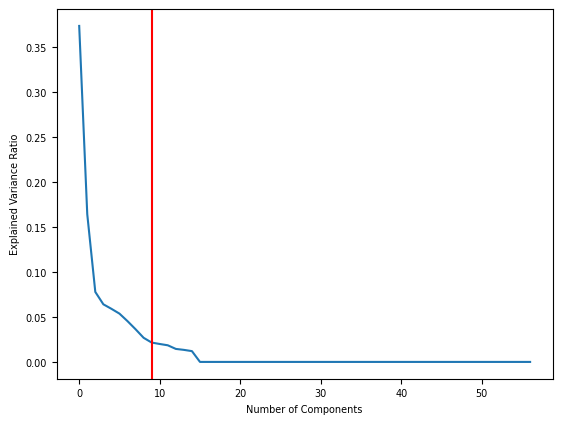

In [28]:
# Split data into features and target variable
X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal number of components using PCA
pca = PCA()
pca.fit(X_train_scaled)

# Determine optimal number of components based on elbow point
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.argmax(cumulative_variance_ratio > 0.90) + 1

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.axvline(optimal_num_components, color='r')
plt.show()

# Transform training and testing data using PCA
pca = PCA(n_components=optimal_num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
# Create a logistic regression object
logreg = LogisticRegression(class_weight={0: 1, 1: 15}, random_state=42, solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train_pca, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_test_pca)

print('F1 Score:', f1_score(y_test, y_pred, pos_label=1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

data4 = {'Feature selection method': ['PCA Logistic Regression'], 
         'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
         'Accuracy': [accuracy_score(y_test, y_pred)], 
         'Precision': [precision_score(y_test, y_pred)], 
         'Recall': [recall_score(y_test, y_pred)],
         'ROC-AUC score': [roc_auc_score(y_test, y_pred)]}

df4 = pd.DataFrame(data4)
df = df.append(df4, ignore_index=True)


F1 Score: 0.12214137214137215
Accuracy: 0.42350029866029526
Precision: 0.06772334293948126
Recall: 0.6216931216931217
ROC-AUC score: 0.5157630982906911
[[4493 6470]
 [ 286  470]]


When you perform principal component analysis (PCA), the original features are transformed into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original features and have no direct relationship with the original feature names.

When you perform regression on the principal components, you can extract the coefficients of the principal components and use them to interpret the effect of each principal component on the dependent variable. However, you cannot directly associate these coefficients with the original feature names because the principal components are linear combinations of multiple original features.

In [30]:
# Extract the coefficients of the principal components
pca_coef = logreg.coef_

# Get the names of the principal components
component_names = ['PC{}'.format(i+1) for i in range(optimal_num_components)]

# Create a DataFrame to store the coefficients and component names
pca_coef_df = pd.DataFrame(pca_coef, columns=component_names)

# Print the DataFrame
print(pca_coef_df)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.004571  0.011837 -0.008124  0.000191 -0.018545 -0.013416  0.007878   

        PC8       PC9  
0  0.002215 -0.006547  


In the logreg.coef_ output there is only one row because you have a binary outcome variable. The coefficient values in that row represent the effect of each principal component on the log odds of belonging to the positive class (i.e., class 1).

So, the value of 0.004441 for PC1 represents the coefficient for PC1 in the logistic regression model, which tells you the effect of a one-unit increase in PC1 on the log odds of belonging to class 1. A positive coefficient value suggests that an increase in PC1 is associated with an increase in the log odds of belonging to class 1, while a negative coefficient value suggests the opposite.

In [31]:
df

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693


## Decision Trees



Decision trees are one of the most popular machine learning algorithms used for classification and regression tasks. They work by recursively splitting the data based on the features that provide the most information gain in separating the classes. However, the effectiveness of decision trees for your specific problem depends on several factors, including the number of explanatory variables, class imbalance, and the correlation between the variables and the target.

A binary classification problem with 79 explanatory variables and an imbalanced class ratio of 1:15, means that there are far fewer positive samples (is claim = 1) than negative samples (is claim = 0) in your dataset. This imbalance can lead to several issues when training a decision tree:

1. Bias towards the majority class: The decision tree algorithm tries to minimize the overall impurity of the dataset by creating splits that separate the positive and negative samples. However, in the case of imbalanced data, the algorithm may end up creating splits that favor the majority class, leading to poor performance on the minority class.
2. Overfitting: Decision trees are prone to overfitting when the number of features is high relative to the sample size, and the dataset is noisy. In your case, with 79 explanatory variables, the decision tree may create many splits, resulting in a complex model that fits the noise in the data rather than the underlying pattern.
3. Uninformative variables: With 79 variables, it's possible that many of them are uninformative and do not contribute to the prediction of the target variable. Including such variables in the model can lead to poor performance and increased complexity.
However, decision trees can also be a good choice for your problem under certain conditions:

Nonlinear relationships: Decision trees can capture nonlinear relationships between the explanatory variables and the target variable, which may be useful if the relationship is not easily modeled by a linear algorithm.
1. Interpretable: Decision trees are easy to interpret and provide insights into the decision-making process, making it easy to explain to non-experts.
2. Handles missing data: Decision trees can handle missing data by using surrogate splits, making it a useful algorithm when dealing with real-world datasets that often have missing values.

Using oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help alleviate the class imbalance problem and improve the performance of decision trees.

SMOTE works by creating synthetic samples for the minority class by interpolating between the existing samples in the feature space. By adding more positive samples to the dataset, it reduces the bias towards the majority class and provides the decision tree algorithm with more information to learn from. This can help improve the accuracy of the decision tree on the minority class while also reducing the risk of overfitting.

However, it's important to keep in mind that oversampling techniques like SMOTE can also introduce some potential issues:

1. Overfitting: Oversampling can lead to overfitting if the synthetic samples are too similar to the original ones, leading to a model that performs well on the training data but poorly on the test data.
2. Noise: The synthetic samples created by SMOTE may not be representative of the true distribution of the minority class, leading to the introduction of noise into the model.
3. Computationally expensive: SMOTE and other oversampling techniques can be computationally expensive, especially if the dataset is large, leading to longer training times.

Hence this section will have the following structure. First, using Grid Search, the best hyperparameters for the decision tree will be found, then the decision tree will be calulated. Next we consider the decision tree with oversampling by implementing SMOTE to rebalance the classes to have a new resampled data set with equal number of classes 0 and 1. Then the decision tree is implemented the same way as before. The results are then collected in a table and assessed at the end of the section. 

Accuracy: 0.9345507295844355
Recall: 0.5001140802130495


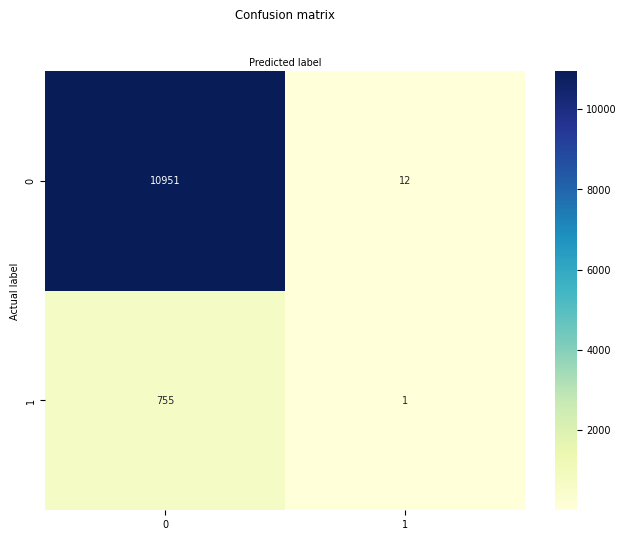

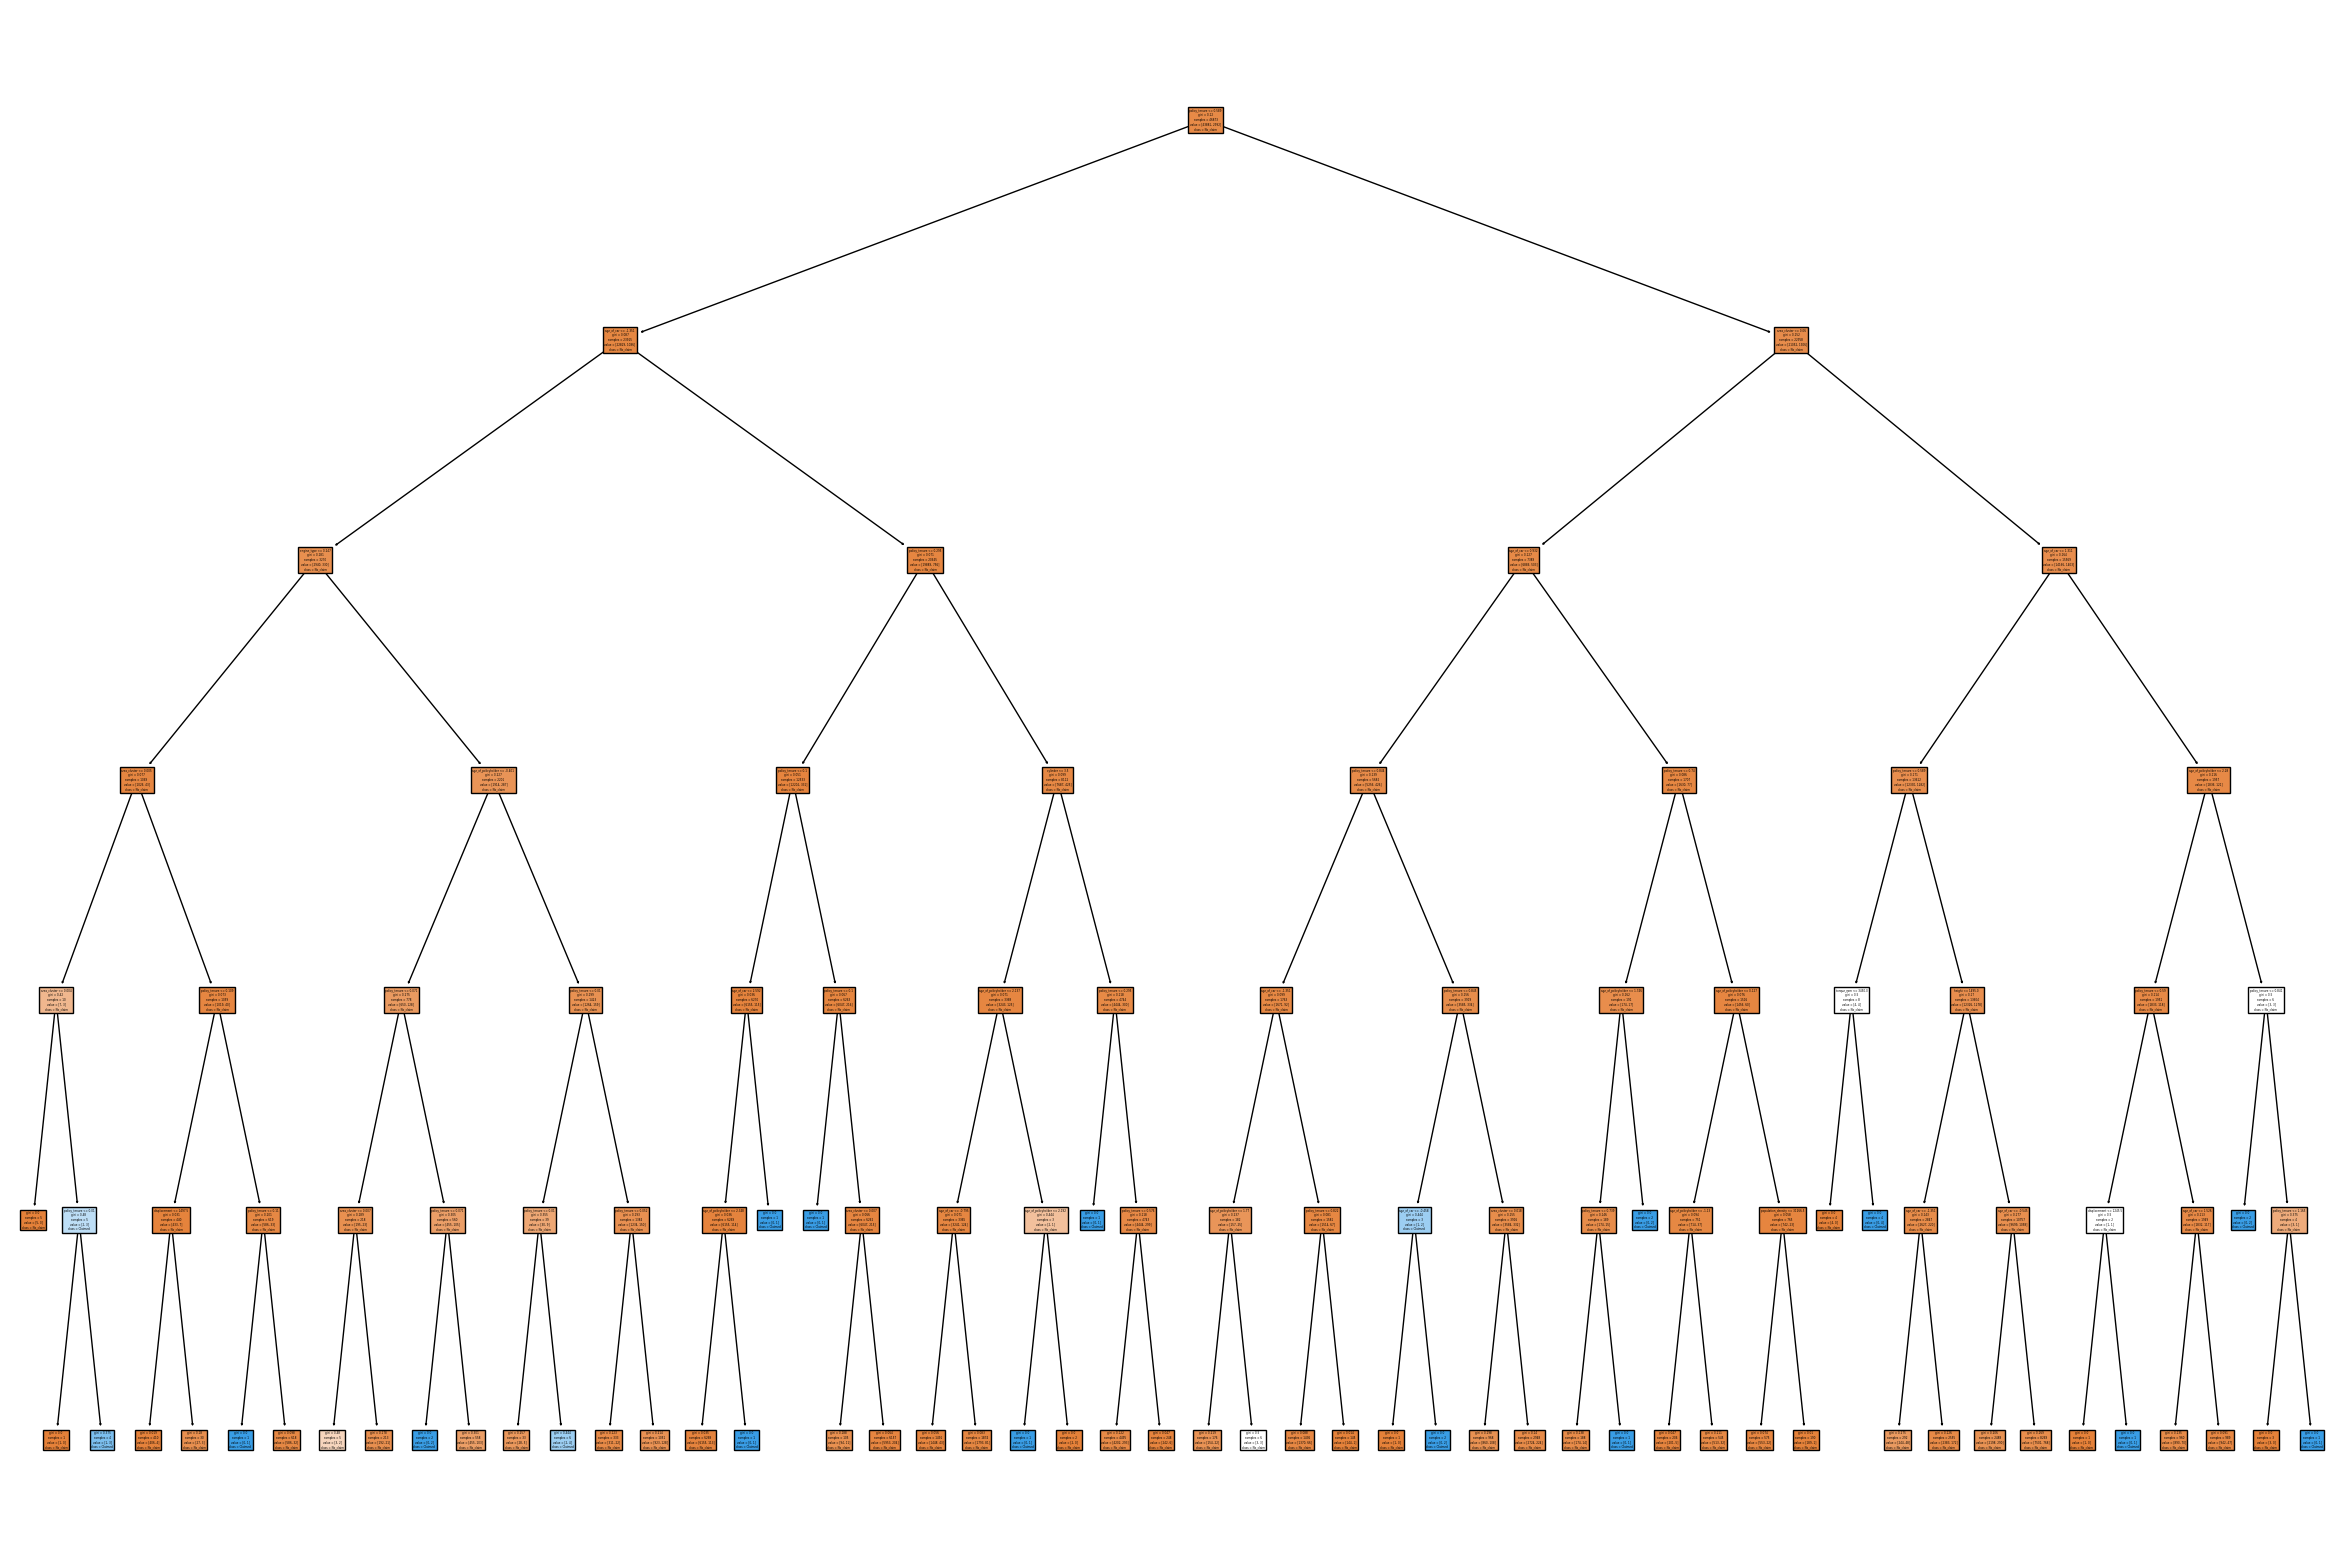

              precision    recall  f1-score   support

    No_claim       0.94      1.00      0.97     10963
     Claimed       0.08      0.00      0.00       756

    accuracy                           0.93     11719
   macro avg       0.51      0.50      0.48     11719
weighted avg       0.88      0.93      0.90     11719

Feature importances:

policy_tenure: 0.4438
age_of_car: 0.2630
age_of_policyholder: 0.0878
area_cluster: 0.0715
engine_type: 0.0707
torque_rpm: 0.0242
cylinder: 0.0162
height: 0.0121
displacement: 0.0088
population_density: 0.0019


In [32]:
#split dataset in features and target variable
X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']
features = X.columns

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=6, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

df5 = {'Feature selection method': ['Decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df5 = pd.DataFrame(df5)
df = df.append(df5, ignore_index=True)

# Get feature importances
importances = clf.feature_importances_

# Create a list of (feature, importance) tuples for nonzero importances
feature_importances = [(feature, importance) for feature, importance in zip(features, importances) if importance != 0]

# Sort the list by importance (in descending order)
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature importances:\n")
# Print the feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")

When there are zeros or very low values in the True Negatives (TN) and False Positives (FP) cells of the confusion matrix, it can indicate that the model is not able to correctly predict negative samples. This can lead to poor performance metrics, such as low precision or recall.

For example, if the TN cell is zero or close to zero, it means that the model is not able to correctly identify true negatives, which are cases where the actual class is negative and the model also predicts it as negative. This can lead to a high number of false positives (FP), which are cases where the actual class is negative, but the model predicts it as positive. In this case, the precision of the model can be affected because it is calculated as the ratio of true positives to the sum of true positives and false positives.

Similarly, if the FP cell is zero or close to zero, it means that the model is not able to correctly identify false positives, which are cases where the actual class is positive, but the model predicts it as negative. This can lead to a high number of false negatives (FN), which are cases where the actual class is positive, but the model predicts it as negative. In this case, the recall of the model can be affected because it is calculated as the ratio of true positives to the sum of true positives and false negatives.

In general, a model that is not able to correctly predict negative samples can indicate that there are issues with the model's training or that the dataset is imbalanced. To address this issue, you can try techniques such as adjusting the class weights, oversampling the minority class, or using a different algorithm that is better suited for imbalanced datasets.

Accuracy: 0.5164263162385869
Recall: 0.6177704153509134


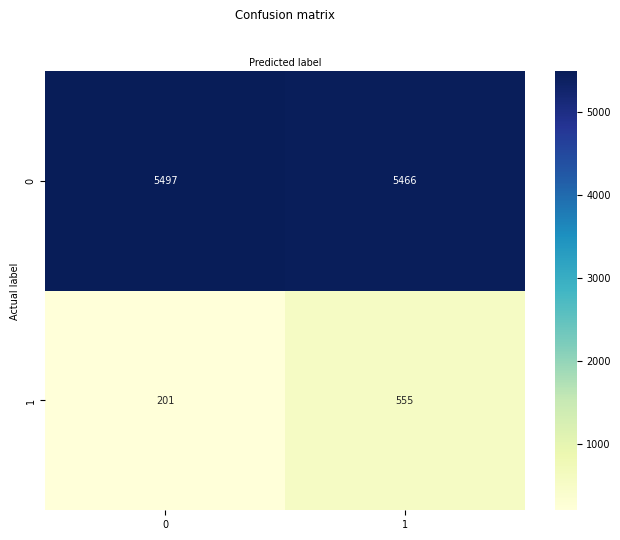

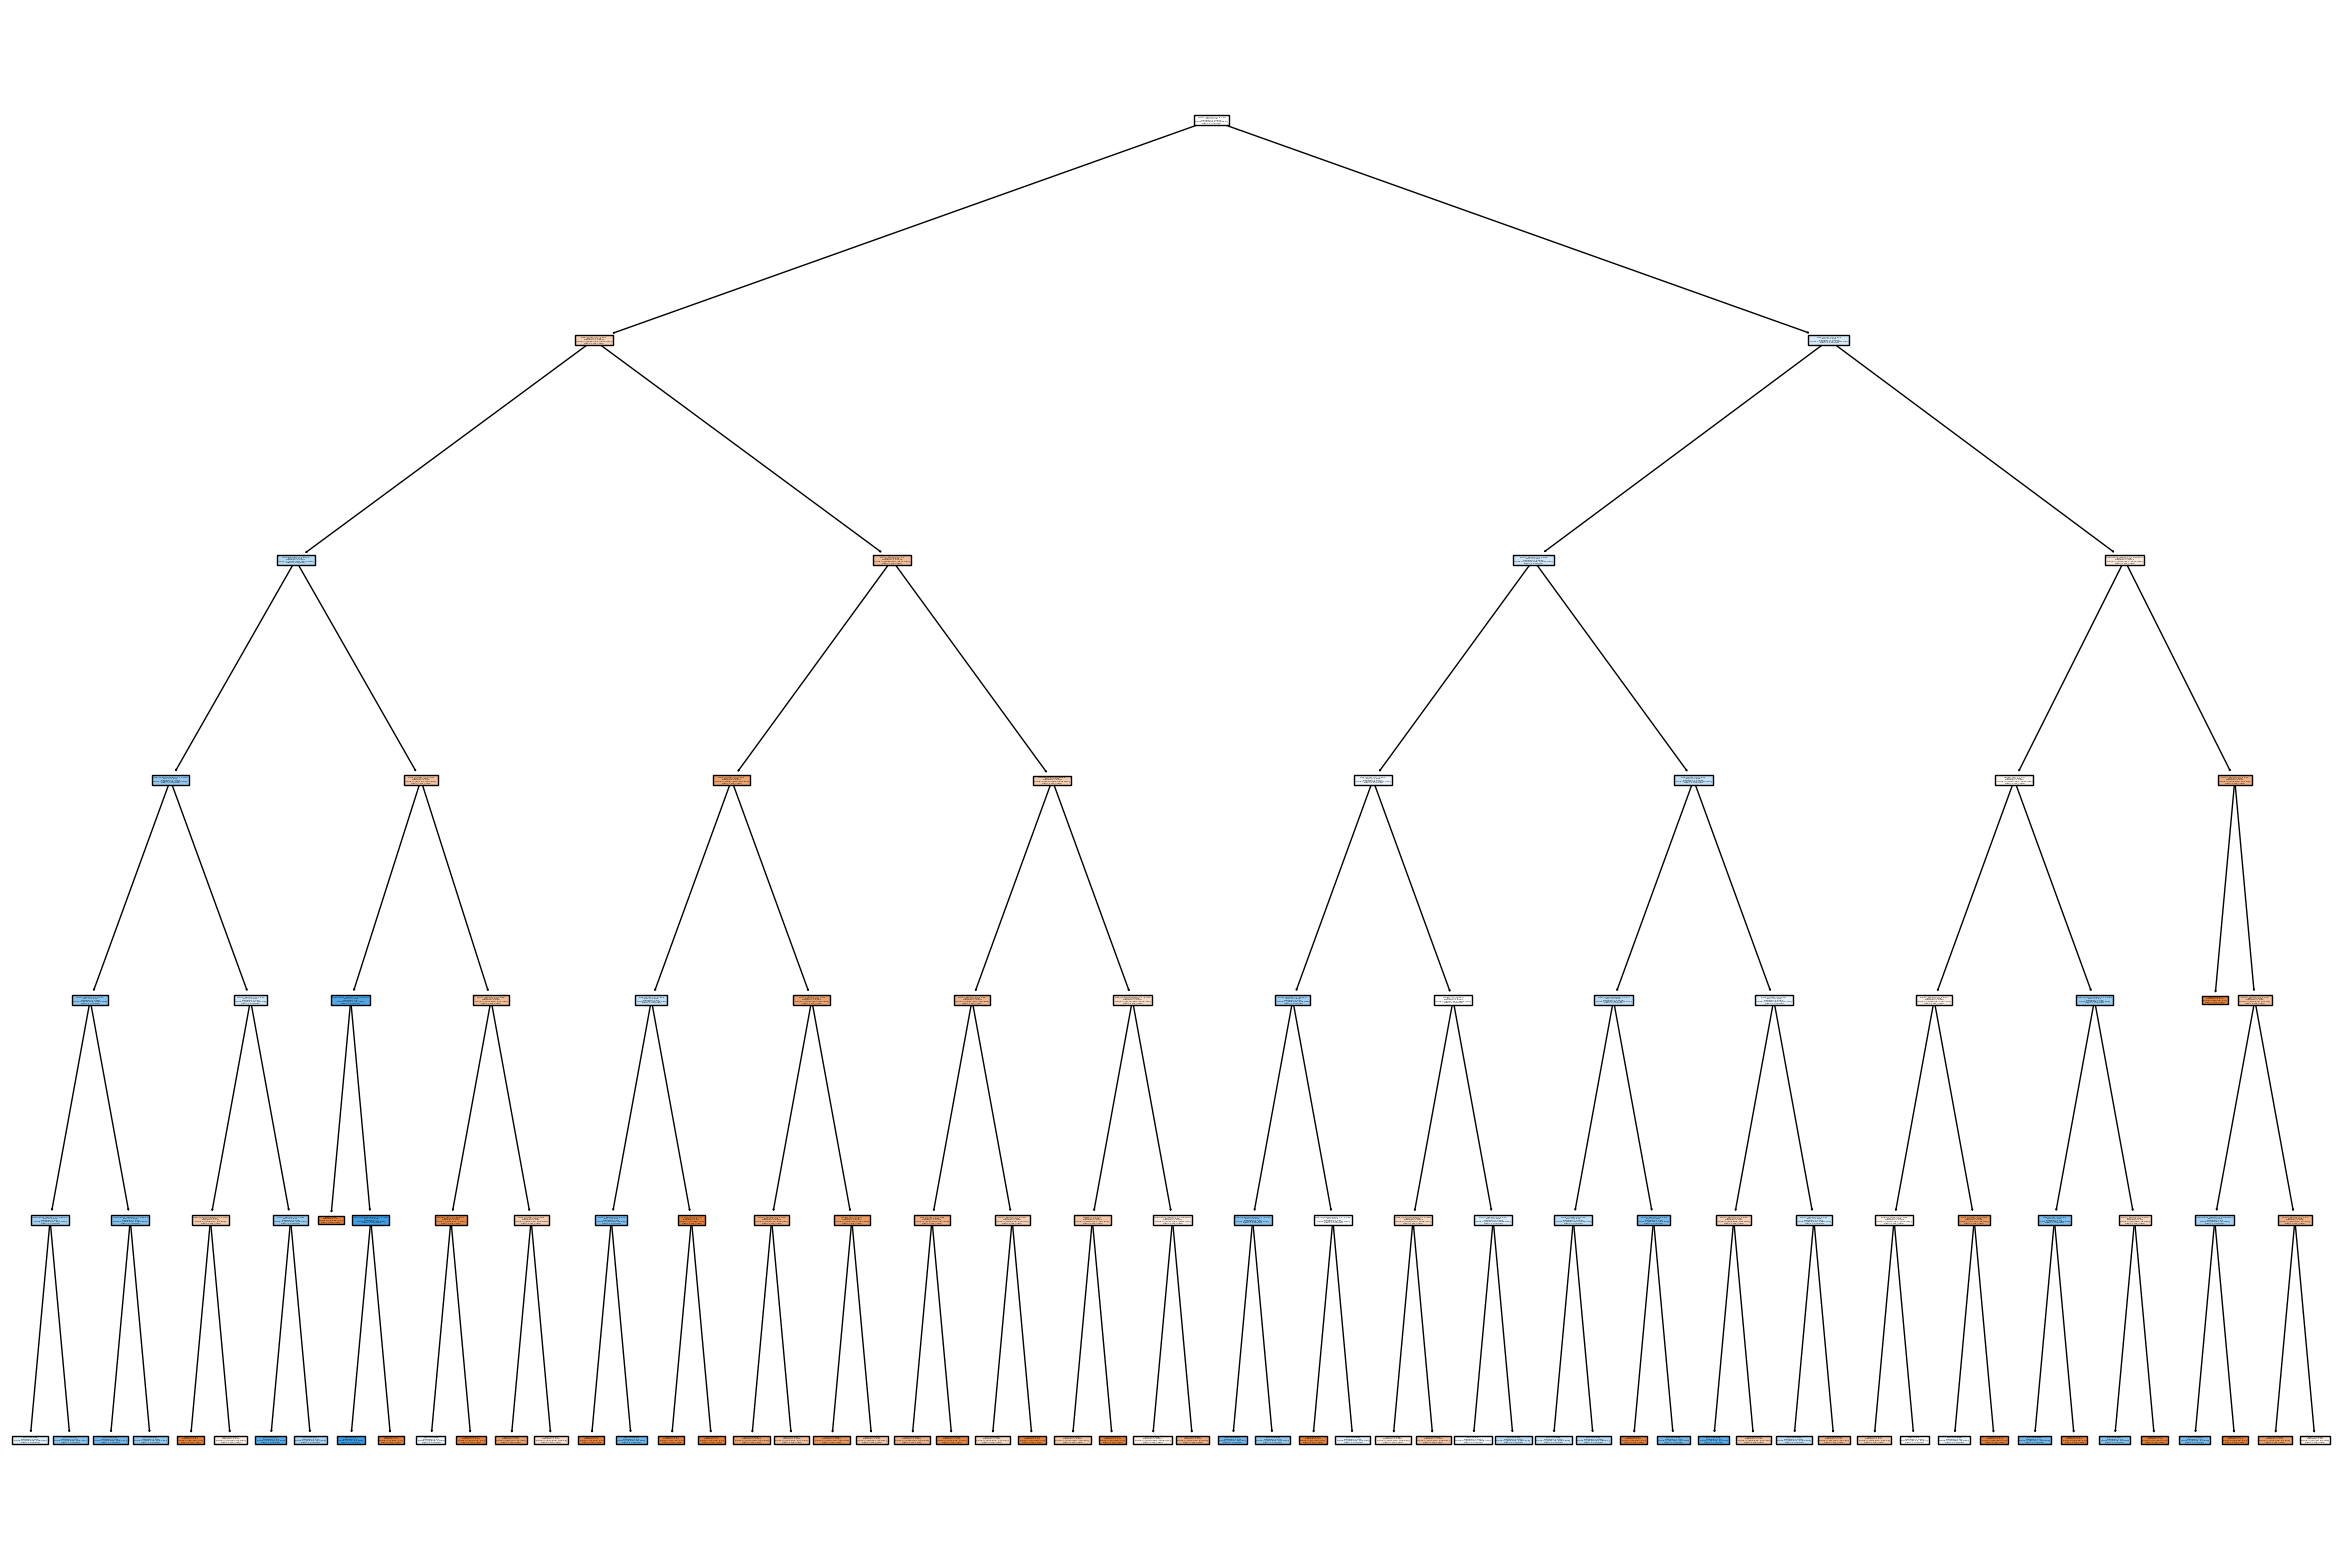

              precision    recall  f1-score   support

    No_claim       0.96      0.50      0.66     10963
     Claimed       0.09      0.73      0.16       756

    accuracy                           0.52     11719
   macro avg       0.53      0.62      0.41     11719
weighted avg       0.91      0.52      0.63     11719

Feature importances:

policy_tenure: 0.4444
age_of_car: 0.2864
displacement: 0.0796
age_of_policyholder: 0.0454
area_cluster: 0.0429
height: 0.0340
population_density: 0.0310
gross_weight: 0.0097
make_4: 0.0071
model_M5: 0.0063
model_M7: 0.0052
engine_type: 0.0049
torque_rpm: 0.0031
is_esc_Yes: 0.0000


In [33]:
#split dataset in features and target variable
X = dataset.drop('is_claim', axis=1)
y = dataset['is_claim']
features = X.columns

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

df6 = {'Feature selection method': ['Balanced decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df6 = pd.DataFrame(df6)
df = df.append(df6, ignore_index=True)

# Get feature importances
importances = clf.feature_importances_

# Create a list of (feature, importance) tuples for nonzero importances
feature_importances = [(feature, importance) for feature, importance in zip(features, importances) if importance != 0]

# Sort the list by importance (in descending order)
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature importances:\n")
# Print the feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")

In DecisionTreeClassifier, max_depth is a parameter that controls the maximum depth of the decision tree. The depth of a decision tree is the length of the longest path from the root node to any leaf node.

Setting max_depth can help to prevent overfitting by limiting the complexity of the tree. A tree that is too deep can overfit the training data, meaning that it will perform well on the training data but poorly on new, unseen data.

By limiting the depth of the tree, the model is less likely to overfit and more likely to generalize well to new data. However, setting max_depth too low can also lead to underfitting, where the model is too simple and does not capture the underlying patterns in the data.

A good strategy is to try different values of max_depth and evaluate the performance of the model on a validation set or using cross-validation. This can help you to find the optimal value of max_depth that balances the trade-off between overfitting and underfitting.

In [34]:
from sklearn.model_selection import GridSearchCV

# Create the decision tree model
model = DecisionTreeClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': range(1, 31)
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best average F1 score: {grid_search.best_score_:}')

Best hyperparameters: {'max_depth': 30}
Best average F1 score: 0.08601615173586938


It is possible that the model is overfitting the data by selecting a max_depth that is too high. One possible explanation for why the max_depth keeps increasing is that the decision tree is able to fit the training data better and better as the depth increases, and so the cross-validation score continues to improve.

However, as you mentioned, a decision tree that is too deep can overfit the training data and perform poorly on new, unseen data. One way to prevent overfitting is to use regularization techniques such as pruning, which remove branches of the tree that do not improve the performance on the validation set.

One option to try is to use a smaller range of max_depth values in the param_grid, for example, by reducing the upper bound of the range. This can prevent the model from overfitting and give you a better estimate of the optimal max_depth.

Alternatively, you can try using a different evaluation metric such as accuracy, precision, or recall, or a combination of metrics using scikit-learn's make_scorer function, to see if the optimal max_depth changes. This can help you to select a model that performs well across multiple metrics, rather than just one.

### Decision Tree with oversampling

Both class_weight='balanced' and oversampling techniques such as SMOTE aim to address the issue of imbalanced datasets in classification problems.

The main difference between these two approaches is how they address the imbalance.

When you set class_weight='balanced', the model adjusts the weights of each class during the training process, so that the model pays more attention to the minority classes. This approach can work well when the imbalance is not severe, or when the dataset is not too large.

On the other hand, oversampling techniques such as SMOTE generate synthetic samples for the minority classes, effectively increasing the number of samples in these classes. This can work well when the imbalance is severe, or when the dataset is large.

While SMOTE oversampling can be an effective way to address class imbalance, there are some potential downsides to using it with a decision tree:

- Overfitting: Oversampling with SMOTE can introduce synthetic samples that are similar to existing samples in the minority class, which can increase the risk of overfitting. This can be particularly problematic with decision trees, which are prone to overfitting if the tree is too complex.  
- Loss of information: Oversampling with SMOTE can potentially introduce bias into the dataset by replicating minority class samples, which can result in a loss of information. This is because the oversampling may not accurately reflect the distribution of the minority class in the population.  
- Difficulty in interpretation: Oversampling with SMOTE can make the decision tree more complex, which can make it harder to interpret the tree and understand how it is making predictions.  

Accuracy: 0.4600221861933612
Recall: 0.5907023962756882


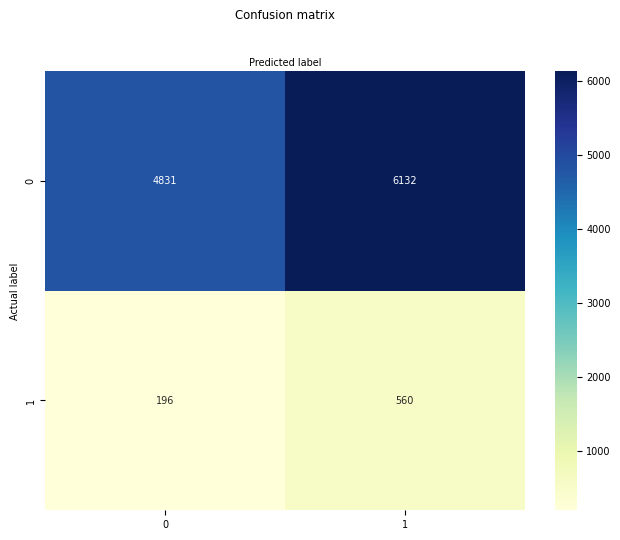

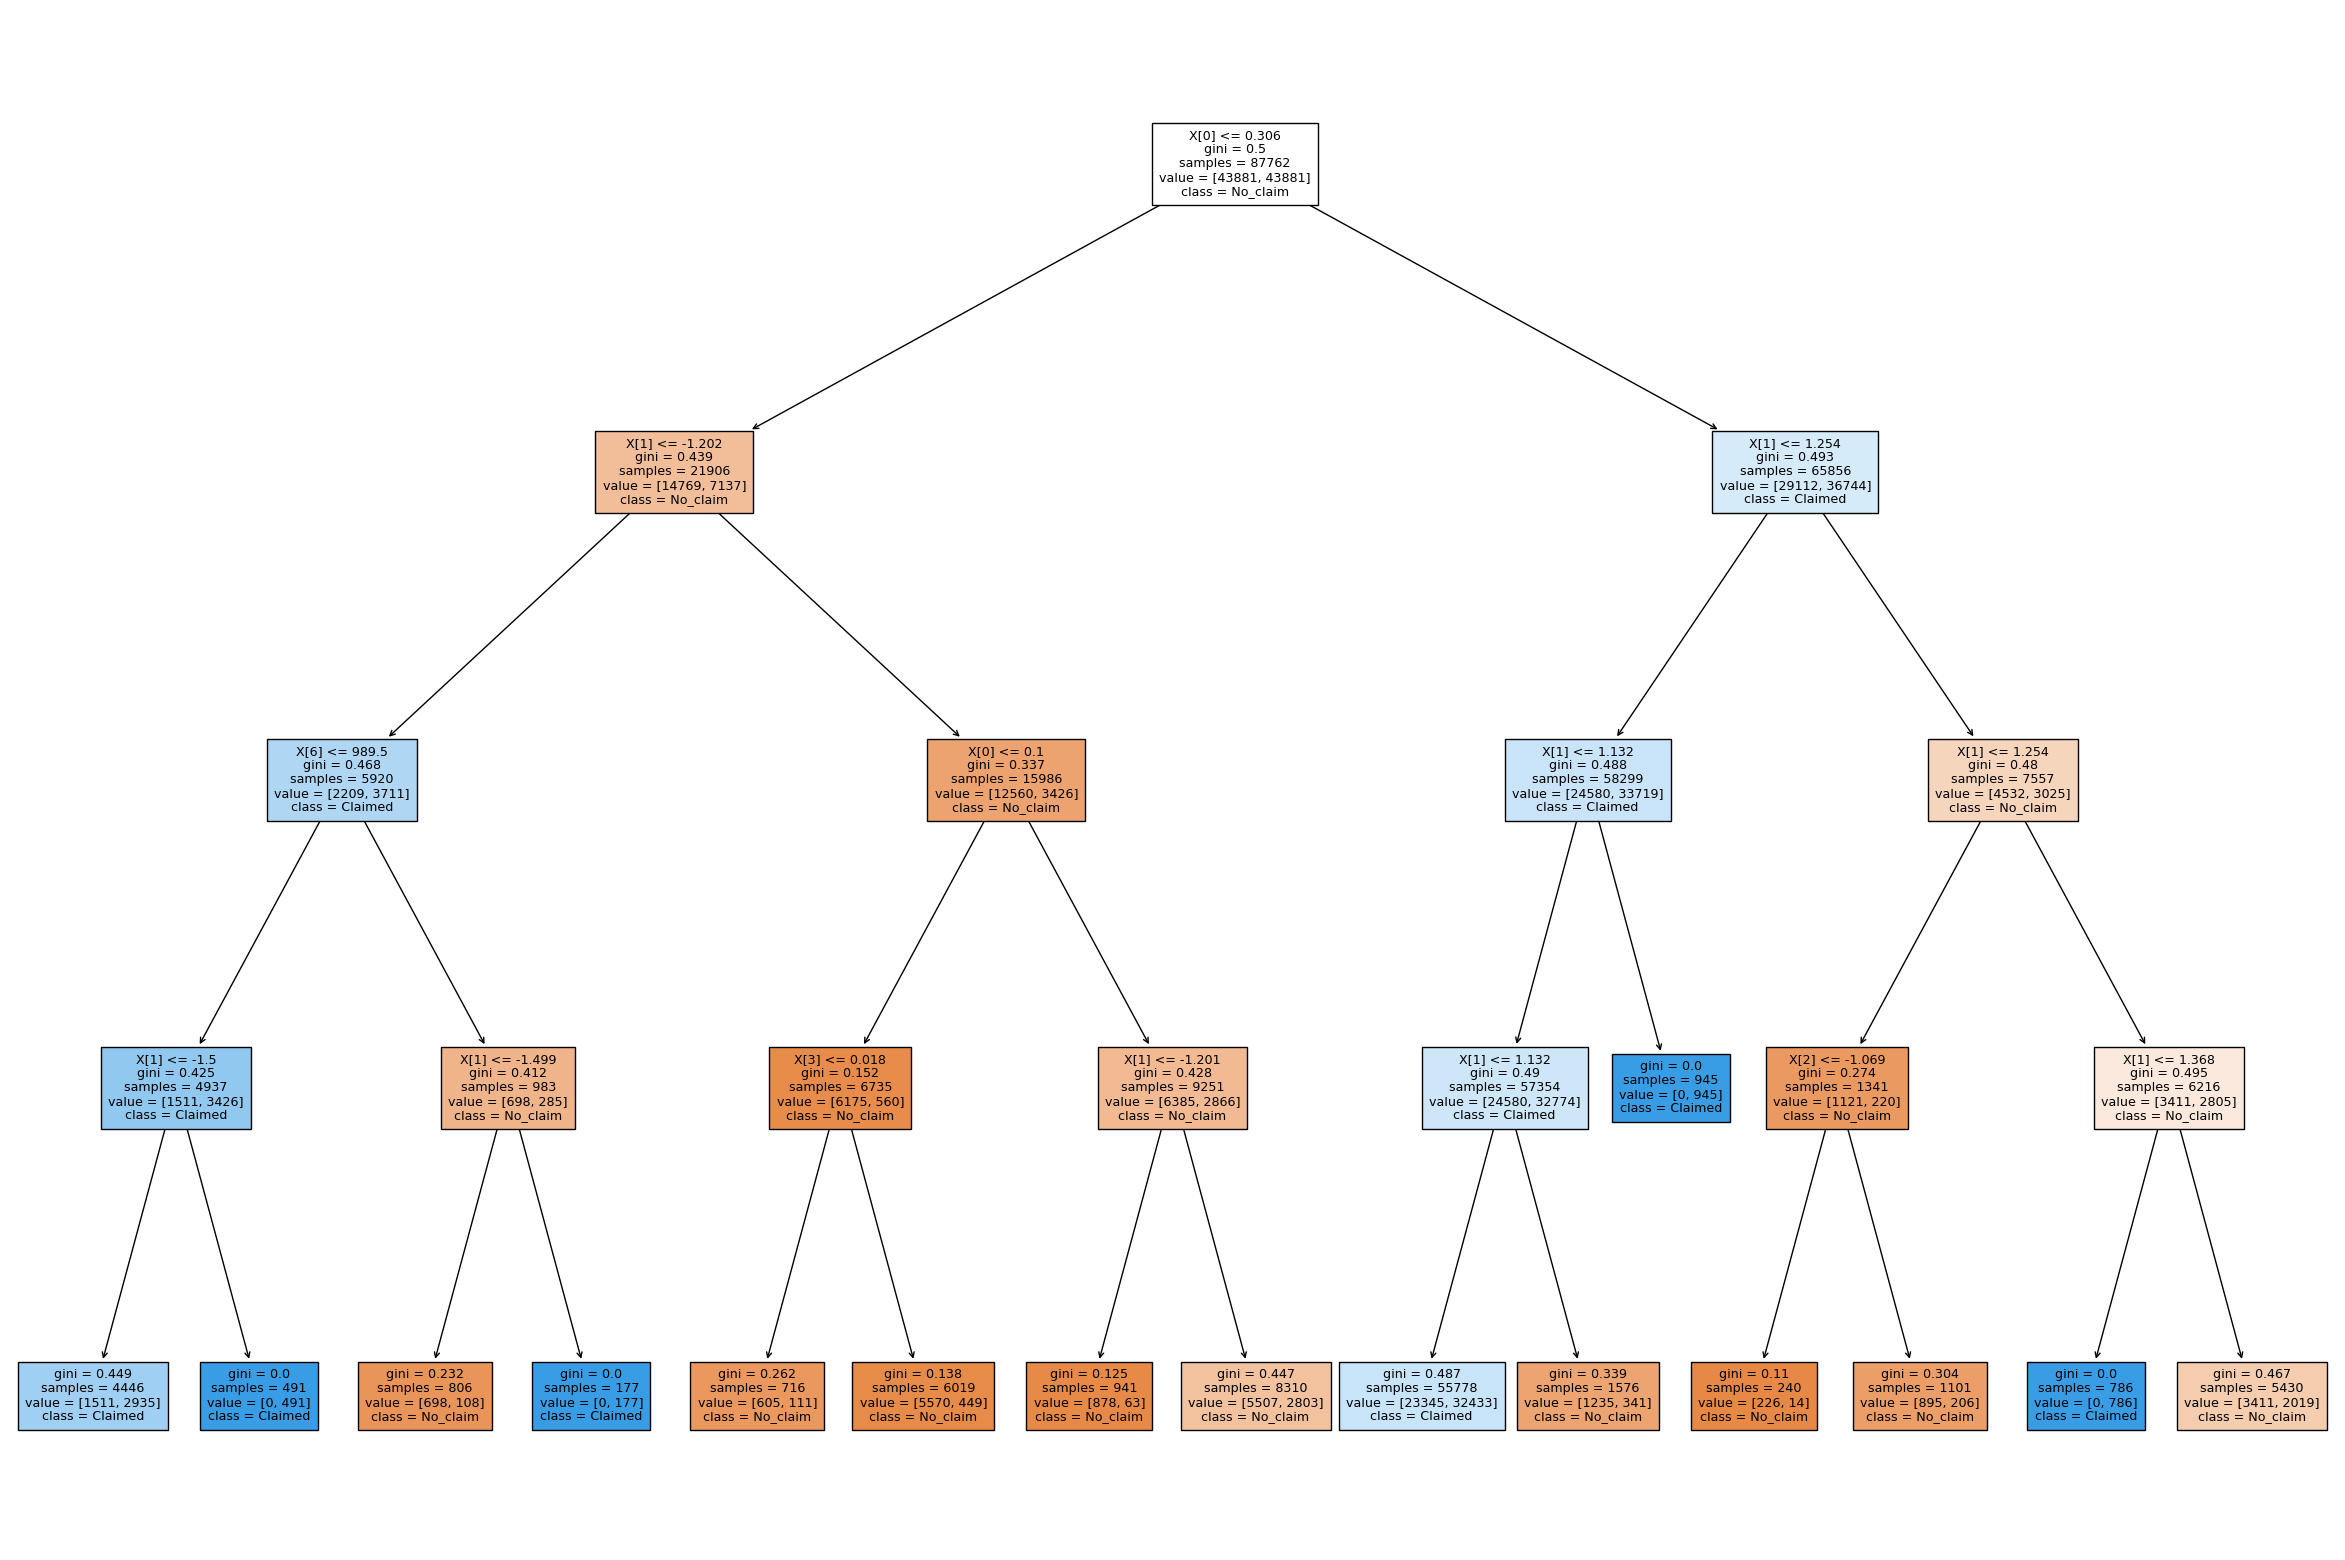

              precision    recall  f1-score   support

    No_claim       0.96      0.44      0.60     10963
     Claimed       0.08      0.74      0.15       756

    accuracy                           0.46     11719
   macro avg       0.52      0.59      0.38     11719
weighted avg       0.90      0.46      0.57     11719

Feature importances:

age_of_car: 0.6083
policy_tenure: 0.3466
displacement: 0.0427
area_cluster: 0.0013
age_of_policyholder: 0.0010


,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741


In [35]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Fit and transform the data
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train) # this is the new resampled data set with equal number of classes 0 and 1 

# Create and fit the decision tree model
model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X_oversampled, y_oversampled, cv=10)
scores.mean()

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_oversampled, y_oversampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf,class_names=['No_claim','Claimed'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['No_claim','Claimed']
print(classification_report(y_test, y_pred, target_names=target_names))

# Get feature importances
importances = clf.feature_importances_

# Create a list of (feature, importance) tuples for nonzero importances
feature_importances = [(feature, importance) for feature, importance in zip(features, importances) if importance != 0]

# Sort the list by importance (in descending order)
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature importances:\n")
# Print the feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")
    
df7 = {'Feature selection method': ['Oversampled decision tree'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df7 = pd.DataFrame(df7)
df = df.append(df7, ignore_index=True)
df

The regular decision tree has a high accuracy, but low precision and ROC-AUC score, indicating that it has a high number of false positives and may not perform well in predicting positive cases. The low recall score also indicates that the model has a high number of false negatives, meaning it may not capture all positive cases.
The balanced decision tree has a significantly lower accuracy than the previous model, but has a higher ROC-AUC score and recall, indicating that it performs better in identifying positive cases. However, the precision is still relatively low, indicating that it may still have a high number of false positives.
The Oversampled decision tree has the lowest accuracy of the three, but a better recall, only marginally though. The ROC is also worse than the balanced decision tree, but this is expected. 

Overall, it seems that the Balanced Decision Tree method (method 5) performed the best in terms of recall and ROC-AUC score combined. This method had a recall of 0.734 and a ROC-AUC score of 0.618, which either higher or relatively similar to the other two methods.

## Random Forest

Random forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make more accurate predictions than any individual decision tree could achieve on its own.

Here's how a random forest works:

- Random subsets of the training data are selected with replacement (this is called "bootstrapping") to create multiple training sets.

- A decision tree is then built using each of these training sets, but with one key difference: only a random subset of the available features is considered when splitting each node of the tree. This helps to reduce overfitting and improves the model's generalization ability.

- The random forest algorithm then combines the output of each individual decision tree to make a final prediction. In the case of classification, this typically involves taking a majority vote of the predicted class labels from all the trees.

One of the key strengths of the random forest algorithm is that it can handle unbalanced data well, particularly in the case of classification. This is because each decision tree in the forest is trained on a random subset of the data, which means that it is less likely to be biased towards the majority class. Additionally, the majority vote approach used to combine the predictions of all the trees means that the algorithm is naturally resistant to class imbalance.

In summary, the random forest algorithm is a powerful ensemble learning method that uses multiple decision trees to make more accurate predictions. By training each tree on a random subset of the data and a random subset of the features, the algorithm is able to reduce overfitting and handle unbalanced data well.

Accuracy: 0.93
Recall: 0.01
Precision: 0.10
              precision    recall  f1-score   support

     refused       0.94      0.99      0.96     10977
    accepted       0.10      0.01      0.02       742

    accuracy                           0.93     11719
   macro avg       0.52      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719



,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434


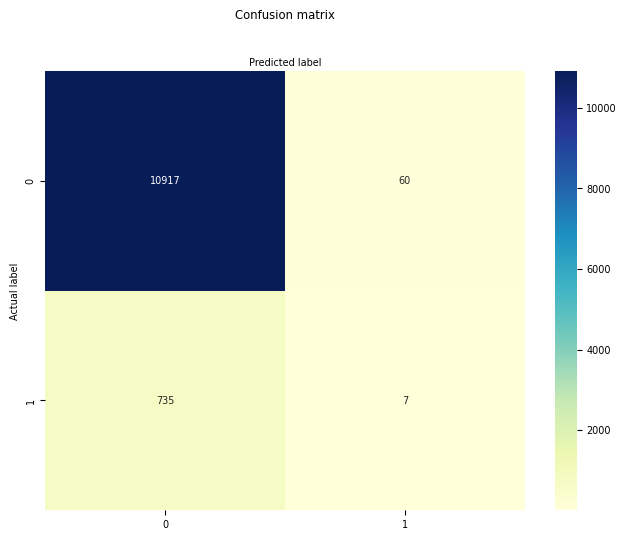

In [36]:

X = dataset.drop(['is_claim'],axis=1)# Features
y = dataset.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df_results = pd.DataFrame(features, columns =['Feature'])
df_results['coefficients']=clf.feature_importances_.T
df_results.sort_values(by='coefficients',ascending=False)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

df8 = {'Feature selection method': ['Random Forest'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df8 = pd.DataFrame(df8)
df = df.append(df8, ignore_index=True)
df

The results of the random forest model show an overall accuracy of 0.93, which means that the model correctly predicted the outcome for 93% of the cases in the test set. However, when looking at the precision and recall scores, it becomes clear that the model is not performing well on the minority class (accepted), with a precision score of only 0.10 and a recall score of only 0.01. This means that out of all the cases predicted as accepted, only 10% were actually accepted, and the model is only able to correctly identify 1% of all accepted cases.

Overall, the model seems to be performing well on the majority class but poorly on the minority class, indicating that it may need further tuning or additional data to better capture the patterns in the minority class. The first attempt to improve the model will be to try to add a threshold for the probability of the classification.

Optimal threshold: 0.03


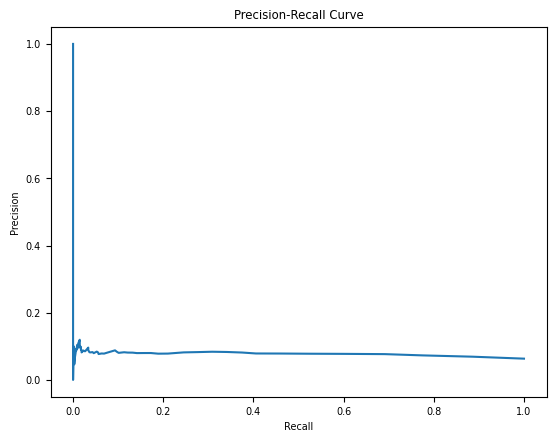

In [37]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.45
Recall: 0.69
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.95      0.44      0.60     10977
    accepted       0.08      0.69      0.14       742

    accuracy                           0.45     11719
   macro avg       0.52      0.56      0.37     11719
weighted avg       0.90      0.45      0.57     11719



,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434
8,Random Forest with threshold,0.138200,0.454049,0.076773,0.564691,0.691375


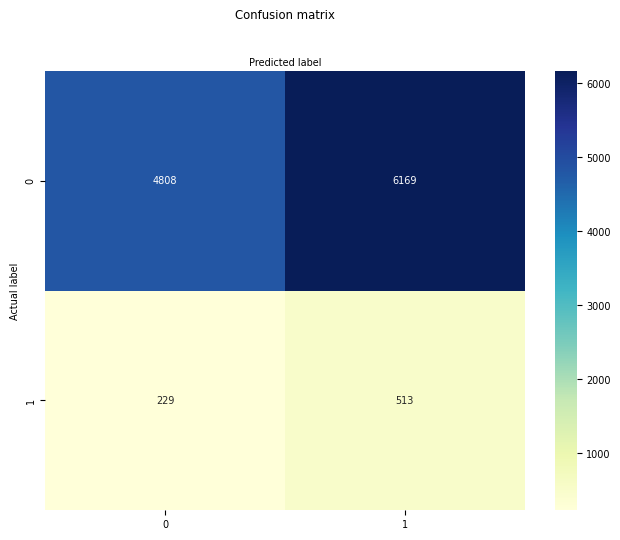

In [38]:
threshold = 0.03

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

df9 = {'Feature selection method': ['Random Forest with threshold'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df9 = pd.DataFrame(df9)
df = df.append(df9, ignore_index=True)
df

In binary classification problems, the output of a model is usually a probability estimate of belonging to the positive class. However, in practice, we often need to make binary decisions (i.e., classify instances as either positive or negative), which requires setting a threshold on the probability estimate. Thresholding is the process of selecting this threshold value and converting the probability estimates to binary predictions based on this threshold.

It sets a threshold value of 0.03 for the predicted probabilities of the positive class (i.e., class 1) from a logistic regression model, and then converts these probabilities to binary predictions using this threshold. By setting a low threshold value of 0.03, the model will predict positive for more instances, potentially increasing the recall at the cost of precision. 

We can notice that recall was indeed leveraged, however the cost on precision is too high. Given the context which the model will be used, the amount of false positives might be missleading to the insurance company risk management department. Even if false positives will most likely bring savings to the company, they will have trouble to have anaccurate planning scenario for their operations.

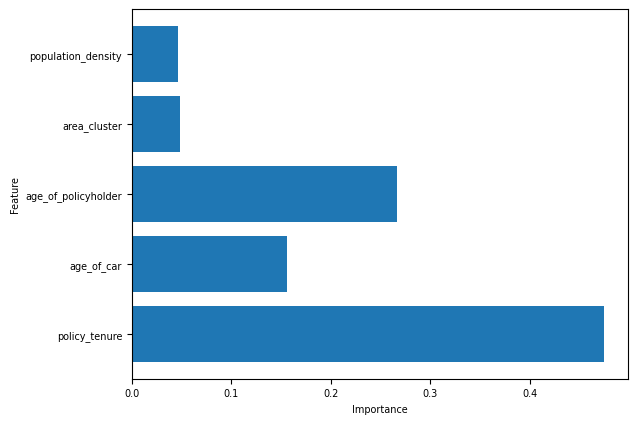

In [39]:
importances = logreg.feature_importances_
features = X.columns

# Filter features based on threshold
threshold = 0.01
important_features = np.where(importances > threshold)[0]
importances = importances[important_features]
features = features[important_features]

plt.barh(range(len(important_features)), importances)
plt.yticks(range(len(important_features)), features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



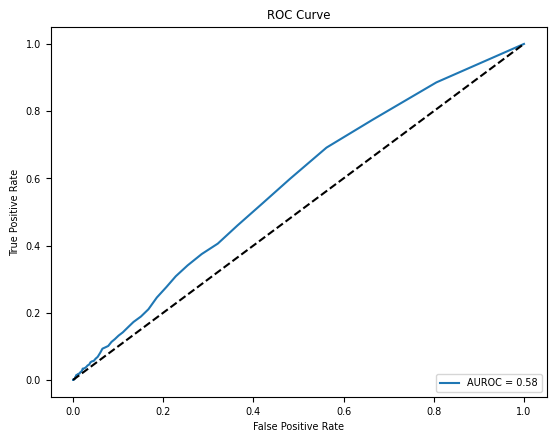

In [40]:
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest models have several advantages over other machine learning models, including their ability to handle complex non-linear relationships, identify interactions between variables, and handle missing values without the need for data imputation. Additionally, one of the benefits of using a Random Forest model is its ability to estimate the importance of each feature in predicting the target variable.

In your specific case, the Random Forest model identified the features of age_of_policyholder, age_of_car, and policy_tenure as important predictors of the target variable. These features can provide valuable insights into the factors that influence whether a claim is accepted or refused.

For instance, the age_of_policyholder feature can give an indication of the level of risk associated with the policyholder, as older individuals may have more experience and be less likely to make a claim. Finally, the policy_tenure feature can provide insights into customer loyalty and satisfaction, as longer tenures may indicate a higher level of trust and confidence in the insurance company.

Overall, the Random Forest model provides a robust approach to feature selection, allowing you to identify the most important predictors and gain insights into the factors that influence the outcome of your target variable. However, the models inability to distinct false positives cases jeopardizes the useability of the model for go-to-market purposes, such as pricing and marketing. Aiming to improve the adaptability of the model we decided to try to better fine tune the model.

- # Randon Forest - Fine Tune:

We are using two key steps to fine-tune the model: oversampling and grid search.

Oversampling is an approach used to balance the dataset by creating synthetic samples of the minority class. This technique is particularly helpful when the data is imbalanced, as in our case where we have very few positive cases compared to the negative ones. Oversampling helps the model to learn more effectively from the minority class, thus improving the accuracy of the predictions.

Grid search, on the other hand, is a hyperparameter optimization technique used to find the best combination of hyperparameters for our specific problem. Hyperparameters are variables that are set before the model is trained and affect the behavior of the model. For example, the number of trees, the maximum depth of the trees, and the minimum number of samples required to split an internal node. By searching through a range of hyperparameter values, we can find the best combination of hyperparameters that results in the best performance of the model.

    We excluded the code for gride search on the code flow out of purpose as it takes to long to run. Below is the outcome of the GridSearch code.

        ```
        Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

        Best recall score: 0.93 
        ```


By combining these two techniques, we can fine-tune the model to perform better on our specific problem. Oversampling helps the model to learn more effectively from the minority class, and grid search helps us to find the best combination of hyperparameters for our specific problem. The features that the model chose, such as age_of_policyholder, age_of_car, and policy_tenure, are the ones that were found to be most important for predicting whether a claim will be accepted or refused. These features can provide valuable insights into the factors that influence the decision to accept or refuse a claim.

In [41]:
# Initialize the SMOTE object with desired hyperparameters
SMOTE = SMOTE(sampling_strategy='auto', random_state=42)

X = dataset.drop(['is_claim'],axis=1)# Features
y = dataset.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# Fit and transform the data
X_oversampled, y_oversampled = SMOTE.fit_resample(X_train, y_train) # this is the new resampled data set with equal number of classes 0 and 1 


In [42]:

# instantiate the model (using the default parameters)
#  OPTIMAL PARAMETERS FROM GRIDSEARCH {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
logreg =RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=1, min_samples_split=2 , random_state=42)

# fit the model with data
clf=logreg.fit(X_oversampled, y_oversampled)
y_pred = logreg.predict(X_test)
df_results = pd.DataFrame(features, columns =['Feature'])
df_results['coefficients']=clf.feature_importances_.T
df_results.sort_values(by='coefficients',ascending=False, inplace=True)


Accuracy: 0.75
Recall: 0.35
Precision: 0.10
              precision    recall  f1-score   support

     refused       0.95      0.78      0.85     10977
    accepted       0.10      0.35      0.15       742

    accuracy                           0.75     11719
   macro avg       0.52      0.57      0.50     11719
weighted avg       0.89      0.75      0.81     11719



,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434
8,Random Forest with threshold,0.138200,0.454049,0.076773,0.564691,0.691375
9,Random Forest with SMOTE,0.152420,0.750405,0.097084,0.565809,0.354447


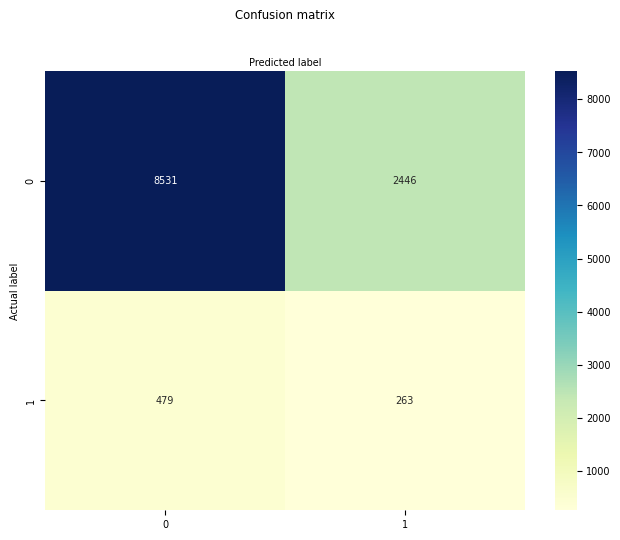

In [43]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

df10 = {'Feature selection method': ['Random Forest with SMOTE'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df10 = pd.DataFrame(df10)
df = df.append(df10, ignore_index=True)
df


If we recall the first attemp of the Random Forest model, we can see that oversampling the minority class using SMOTE and applying the best parameters of GridSearch has improved the recall metric significantly from 0.01 to 0.35. This means that the model after the fine tune is better at identifying the positive class, which in this case represents claims that need to be paid out by the insurance company.

However, the accuracy of the model with oversampling is much lower compared to the model without oversampling, indicating that it is more prone to false positives (i.e., predicting a claim when there is none). This still limits the useability of the model for purposes of either risk identification or pricing initiatives. 

Optimal threshold: 0.46


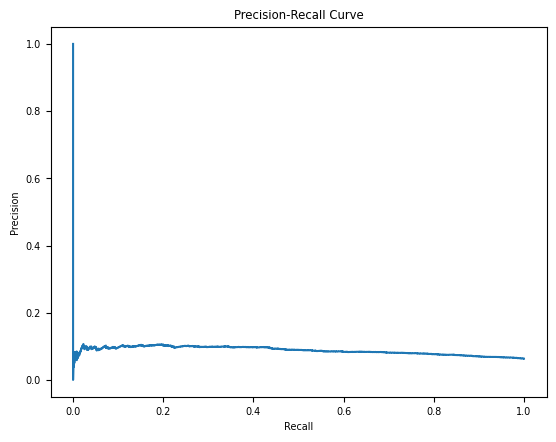

In [44]:
y_scores = logreg.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.72
Recall: 0.42
Precision: 0.10
              precision    recall  f1-score   support

     refused       0.95      0.74      0.83     10977
    accepted       0.10      0.42      0.16       742

    accuracy                           0.72     11719
   macro avg       0.52      0.58      0.49     11719
weighted avg       0.90      0.72      0.79     11719



,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434
8,Random Forest with threshold,0.138200,0.454049,0.076773,0.564691,0.691375
9,Random Forest with SMOTE,0.152420,0.750405,0.097084,0.565809,0.354447


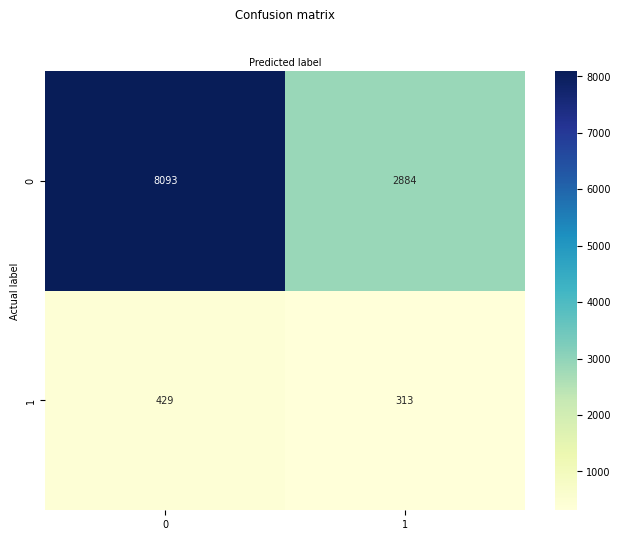

In [45]:
threshold = 0.46

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

df11 = {'Feature selection method': ['Random Forest with SMOTE and threshold'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df11 = pd.DataFrame(df11)
df = df.append(df11, ignore_index=True)
df

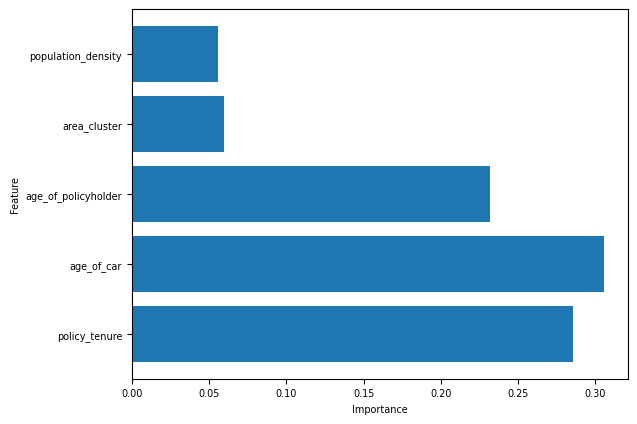

In [46]:
importances = logreg.feature_importances_
features = X.columns

# Filter features based on threshold
threshold = 0.01
important_features = np.where(importances > threshold)[0]
importances = importances[important_features]
features = features[important_features]

plt.barh(range(len(important_features)), importances)
plt.yticks(range(len(important_features)), features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



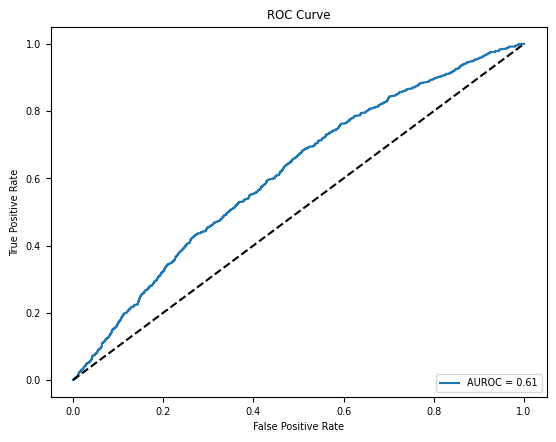

In [47]:
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The model is correctly identifying more of the positive class instances at the cost of misclassifying more of the negative class instances. The precision score remains low, indicating that the model is still not very good at correctly identifying the positive class instances among all predicted positive instances.

There are still further adaptations we could attemp to apply, such as: one way to balance recall and precision is by adjusting the decision threshold. By lowering the threshold, the model will classify more instances as positive (accepted), increasing recall but potentially decreasing precision. On the other hand, by raising the threshold, the model will classify fewer instances as positive, potentially increasing precision but decreasing recall. However we decided to finish the path of this avenue here as it seems to be unlikely to get an uplifit strong enought to surpass the outcome of the best previously presented model.

## XGBoost



XGBoost is a powerful and popular machine learning algorithm that can be used for a wide range of predictive modeling tasks, including classification.

In the context of a car insurance company, XGBoost can be used to predict the likelihood of a claim being filed.
Therefore, there are two use cases for the model's output:
- Predict claim's probability for a given profile;
- Predict claim as a binary variable.

The first usecase can be interesting for risk computation in a more granular way. As for the second usecase, having a binary variable as an outcome will make the model evaluation and comparaison easier.

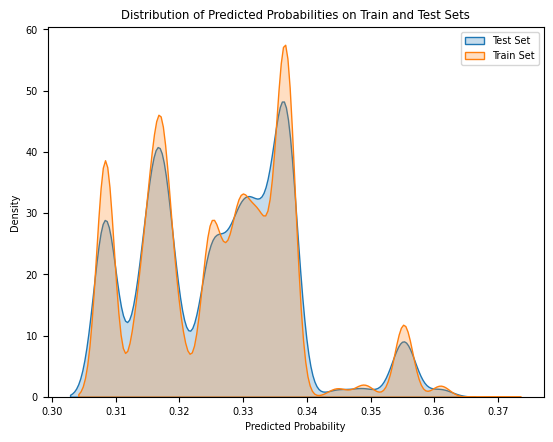

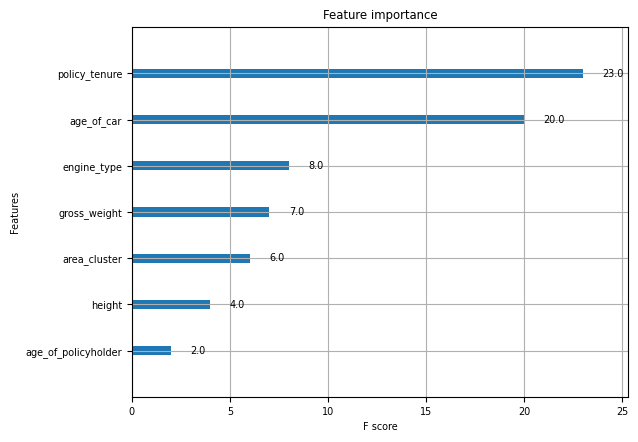

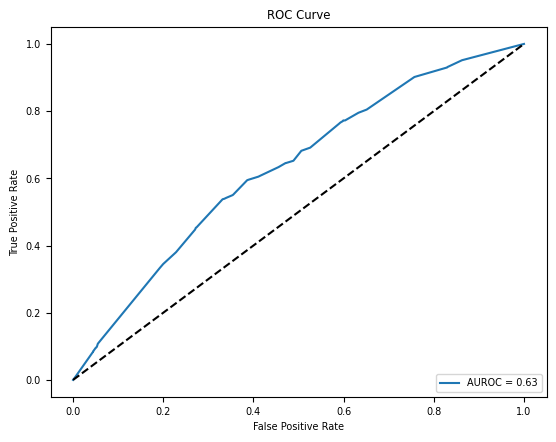

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434
8,Random Forest with threshold,0.138200,0.454049,0.076773,0.564691,0.691375
9,Random Forest with SMOTE,0.152420,0.750405,0.097084,0.565809,0.354447


In [48]:

def xgb_classifier(features, target):
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

    # Convert data into DMatrix format
    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical = True)
    dtest = xgb.DMatrix(X_test, enable_categorical = True)

    # Set parameters for the XGBoost model
    param = {
        'max_depth': 3,
        'eta': 0.05,
        'objective': 'binary:logistic',
        'seed': 16
    }

    # Train the model
    num_round = 10
    bst = xgb.train(param, dtrain, num_round)

    # Make preictions on the train set
    y_pred_train = bst.predict(dtrain)
    # Make predictions on the test set
    y_pred_test = bst.predict(dtest)

    # Create a kernel density plot of the predicted probabilities on the test set
    sns.kdeplot(y_pred_test, shade=True, label='Test Set')

    # Create a kernel density plot of the predicted probabilities on the train set
    sns.kdeplot(y_pred_train, shade=True, label='Train Set')

    # Add labels and a title
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('Distribution of Predicted Probabilities on Train and Test Sets')

    # Add a legend to differentiate between the plots of the train and test sets
    plt.legend()



    return y_pred_train, y_pred_test, bst.get_score(), X_train, X_test, y_train, y_test  


def evaluate_thresholds(y_pred_train, y_train, y_pred_test, y_test, metrics = "test"):

    if metrics == "test":
        # Default threshold (0.5)
        default_threshold = 0.5
        default_y_pred_binary = (y_pred_test >= default_threshold).astype(int)
        default_accuracy = accuracy_score(y_test, default_y_pred_binary)
        default_recall = recall_score(y_test, default_y_pred_binary)
        default_precision = precision_score(y_test, default_y_pred_binary)
        default_roc_auc = roc_auc_score(y_test, default_y_pred_binary)
        default_f1 = f1_score(y_test, default_y_pred_binary, pos_label=1)
        
        # Define thresholds
    

        # Precision-Recall trade-off
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train)
        f1_scores = 2 * precision * recall / (precision + recall)
        best_index = pd.Series(f1_scores).idxmax()
        pr_threshold = thresholds[best_index]
        pr_y_pred_binary = (y_pred_test >= pr_threshold).astype(int)
        pr_accuracy = accuracy_score(y_test, pr_y_pred_binary)
        pr_recall = recall_score(y_test, pr_y_pred_binary)
        pr_precision = precision_score(y_test, pr_y_pred_binary)
        pr_roc_auc = roc_auc_score(y_test, pr_y_pred_binary)
        pr_f1 = f1_score(y_test, pr_y_pred_binary, pos_label=1)
        
        thresholds = np.linspace(0, 1, 100)

        # Balanced Accuracy
        cms = [confusion_matrix(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
        sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
        specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]
        balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]
        ba_threshold = thresholds[np.argmax(balanced_accuracy)]
        ba_y_pred_binary = (y_pred_test >= ba_threshold).astype(int)
        ba_accuracy = accuracy_score(y_test, ba_y_pred_binary)
        ba_recall = recall_score(y_test, ba_y_pred_binary)
        ba_precision = precision_score(y_test, ba_y_pred_binary)
        ba_roc_auc = roc_auc_score(y_test, ba_y_pred_binary)
        ba_f1 = f1_score(y_test, ba_y_pred_binary, pos_label=1)
        
        # Cohen's Kappa
        kappas = [cohen_kappa_score(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
        kappa_threshold = thresholds[np.argmax(kappas)]
        kappa_y_pred_binary = (y_pred_test >= kappa_threshold).astype(int)
        kappa_kappa = cohen_kappa_score(y_test, kappa_y_pred_binary)
        kappa_accuracy = accuracy_score(y_test, kappa_y_pred_binary)
        kappa_recall = recall_score(y_test, kappa_y_pred_binary)
        kappa_precision = precision_score(y_test, kappa_y_pred_binary)
        kappa_roc_auc = roc_auc_score(y_test, kappa_y_pred_binary)
        kappa_f1 = f1_score(y_test, kappa_y_pred_binary, pos_label=1)


    else:
        # Default threshold (0.5)
        default_threshold = 0.5
        default_y_pred_binary = (y_pred_train >= default_threshold).astype(int)
        default_accuracy = accuracy_score(y_train, default_y_pred_binary)
        default_recall = recall_score(y_train, default_y_pred_binary)
        default_precision = precision_score(y_train, default_y_pred_binary)
        default_roc_auc = roc_auc_score(y_train, default_y_pred_binary)
        default_f1 = f1_score(y_train, default_y_pred_binary, pos_label=1)
        
        # Define thresholds
    

        # Precision-Recall trade-off
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train)
        f1_scores = 2 * precision * recall / (precision + recall)
        best_index = pd.Series(f1_scores).idxmax()
        pr_threshold = thresholds[best_index]
        pr_y_pred_binary = (y_pred_train >= pr_threshold).astype(int)
        pr_accuracy = accuracy_score(y_train, pr_y_pred_binary)
        pr_recall = recall_score(y_train, pr_y_pred_binary)
        pr_precision = precision_score(y_train, pr_y_pred_binary)
        pr_roc_auc = roc_auc_score(y_train, pr_y_pred_binary)
        pr_f1 = f1_score(y_train, pr_y_pred_binary, pos_label=1)
        
        thresholds = np.linspace(0, 1, 100)

        # Balanced Accuracy
        cms = [confusion_matrix(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
        sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
        specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]
        balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]
        ba_threshold = thresholds[np.argmax(balanced_accuracy)]
        ba_y_pred_binary = (y_pred_train >= ba_threshold).astype(int)
        ba_accuracy = accuracy_score(y_train, ba_y_pred_binary)
        ba_recall = recall_score(y_train, ba_y_pred_binary)
        ba_precision = precision_score(y_train, ba_y_pred_binary)
        ba_roc_auc = roc_auc_score(y_train, ba_y_pred_binary)
        ba_f1 = f1_score(y_train, ba_y_pred_binary, pos_label=1)
        
        # Cohen's Kappa
        kappas = [cohen_kappa_score(y_train, (y_pred_train >= t).astype(int)) for t in thresholds]
        kappa_threshold = thresholds[np.argmax(kappas)]
        kappa_y_pred_binary = (y_pred_train >= kappa_threshold).astype(int)
        kappa_kappa = cohen_kappa_score(y_train, kappa_y_pred_binary)
        kappa_accuracy = accuracy_score(y_train, kappa_y_pred_binary)
        kappa_recall = recall_score(y_train, kappa_y_pred_binary)
        kappa_precision = precision_score(y_train, kappa_y_pred_binary)
        kappa_roc_auc = roc_auc_score(y_train, kappa_y_pred_binary)
        kappa_f1 = f1_score(y_train, kappa_y_pred_binary, pos_label=1)

    # Create output dataframe
    data = {
        'Analysis': ['Default', 'Precision-Recall trade-off', 'Balanced Accuracy', "Cohen's Kappa"],
        'Threshold': [round(default_threshold, 2), round(pr_threshold, 2), round(ba_threshold, 2), round(kappa_threshold, 2)],
        'Accuracy': [round(default_accuracy, 2), round(pr_accuracy, 2), round(ba_accuracy, 2), round(kappa_accuracy, 2)], 
        'Recall': [round(default_recall, 2), round(pr_recall, 2), round(ba_recall, 2), round(kappa_recall, 2)], 
        'Precision': [round(default_precision, 2), round(pr_precision, 2), round(ba_precision, 2), round(kappa_precision, 2)],
        'f1_score': [round(default_f1,2), round(pr_f1, 2), round(ba_f1, 2), round(kappa_f1, 2)],
        'roc_auc': [round(default_roc_auc,2), round(pr_roc_auc, 2), round(ba_roc_auc, 2), round(kappa_roc_auc, 2)],

    }
    
    df = pd.DataFrame(data)
    return df


#Define Features and Target
X = dataset.drop(['is_claim'],axis=1) # Features
y = dataset.is_claim # Target variable
features=X.columns

#Build the model
y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

# Plot the feature importance scores
plot_importance(model_score)
plt.show()

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_test)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

df12 = {'Feature selection method': ['XGboost'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df12 = pd.DataFrame(df12) 
df = df.append(df12, ignore_index=True)
df

The density graph shows the distribution of the predicted probabilities, both for the train and test set. The range between the minimum and maximum value is particularly small, there isn't a clear pattern to distinguish high probability of claims from the other cases.

Then we can pursue computing a threshold to distinguish the positives and negatives outcomes. For that matter, there are different methods to achieve what could be called an "optimal threshold". After the different metrics are built, the choice of the best model relies on the analyse and comparaison of the differnet scores that matter more for our usecase.

The different analysis used are:
- Default: Use default 0.5 threhsold;
- Precision-Recall trade-off: It is calculated by maximizing F1 scores, getting the best of precision and recall simultaneously;
- Balanced accuracy: It is calculated by maximizing the average of sensitivity (also known as recall or true positive rate) and specificity (also known as true negative rate). Sensitivity measures the proportion of true positive instances that were correctly identified by the model, while specificity measures the proportion of true negative instances that were correctly identified by the model;
- Cohen’s kappa: It is calculated by maximizing Cohen’s kappa, which is a metric that measures the agreement between two raters (in this case, the model and the true values) while taking into account the agreement that would be expected by chance. A kappa value of 1 indicates perfect agreement, while a kappa value of 0 indicates agreement no better than chance.

In [49]:
#Metrics evaluated on train set
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,f1_score,roc_auc
0,Default,0.50,0.94,0.00,0.00,0.00,0.50
1,Precision-Recall trade-off,0.33,0.66,0.57,0.11,0.18,0.62
2,Balanced Accuracy,0.32,0.44,0.81,0.09,0.16,0.61
3,Cohen's Kappa,0.34,0.89,0.14,0.14,0.14,0.54


In [50]:
#Metrics evaluated on test set
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,f1_score,roc_auc
0,Default,0.50,0.94,0.00,0.00,0.00,0.50
1,Precision-Recall trade-off,0.33,0.66,0.54,0.10,0.17,0.60
2,Balanced Accuracy,0.32,0.43,0.77,0.08,0.15,0.59
3,Cohen's Kappa,0.34,0.89,0.11,0.12,0.11,0.53


Taking a look into the results, we must not forget that our dataset is highly imbalanced (and previous attempts showed that oversampling is not effective to correct the bias towards a negative outcome).
As we are trying to predict the risk related to possible claims on the context of a car insurance company, we look for recall. On that matter, the best xgboost model could be the one achieved by Precision-Recall trade-off, or the one based on the balanced accuracy method. To choose it will be necessary to understand how much accuracy could be sacrified to achieve a better recall score.

## Deep Learning Model - MLPClassifier



Deep learning models have become increasingly popular in the insurance industry due to their ability to handle large amounts of data and make accurate predictions. These models have been particularly useful in predicting insurance claims, where accuracy is crucial in order to minimize costs for insurance companies.

One common application of deep learning in insurance is the analysis of claims data to identify patterns and trends. This allows insurers to gain insights into the types of claims being made and the factors that contribute to these claims, enabling them to develop more effective risk management strategies.Deep learning models can also be used to predict the likelihood of future claims, based on a range of factors such as previous claims history, demographic information, and other relevant data. This allows insurers to take proactive measures to prevent claims from occurring or to manage them more effectively when they do occur.

Overall, deep learning models have significant potential to transform the insurance industry by improving accuracy, reducing costs, and enhancing the customer experience. As the technology continues to advance, we can expect to see even more innovative applications of deep learning in insurance in the years to come.

### Data Preparation

In order to develop an effective deep learning model for predicting car insurance claims, it is crucial to ensure that the input data is preprocessed and transformed appropriately. Deep learning models, in contrast to traditional machine learning algorithms, often require a different form of data preparation to maximize their performance and accuracy. This is because deep learning models, such as neural networks, are sensitive to the scale of input features and can be affected by the presence of outliers and imbalanced class distributions.

One essential step in preparing the data for deep learning models is feature scaling, which ensures that all input features have the same range of values. StandardScaler is a popular method used to achieve this, as it transforms the data by centering it around the mean and scaling it to unit variance. This helps the deep learning model to converge more quickly and learn the optimal weights for each feature during the training process.

Another important aspect of data preparation for deep learning models is encoding categorical variables. In our dataset, there may be several categorical features that need to be converted into numerical values before they can be used as inputs to the model. Label Encoder is a useful tool for this purpose, as it assigns a unique integer value to each category within a feature, effectively transforming the categorical variable into a numerical one. This encoding process enables the deep learning model to learn meaningful patterns and relationships between the features and the target variable.

In addition to these data preprocessing steps, it is also important to address any issues related to the distribution of the input features. PowerTransformer, which was used in the previous analyses, is an effective method for handling this aspect of data preparation. By applying a power transformation, PowerTransformer can correct for any skewed or non-normal distributions present in the data, leading to improved model performance and more accurate predictions.

In summary, when developing a deep learning model for predicting car insurance claims, it is essential to properly preprocess and transform the data using techniques such as StandardScaler, Label Encoder, and PowerTransformer. These preprocessing steps ensure that the deep learning model can effectively learn from the input features, resulting in a more accurate and reliable prediction model that can help insurance companies make informed decisions, optimize business processes, and improve customer satisfaction and retention.

**NOTE: You can ignore the first cell. It allows us to add dropout to the regular MLPClassifier.**

In [51]:
class MLPDropout(MLPClassifier):
    
    def __init__(
        self,
        hidden_layer_sizes=(100,),
        activation="relu",
        *,
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=200,
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000,
        dropout = None,
    ):
        '''
        Additional Parameters:
        ----------
        dropout : float in range (0, 1), default=None
            Dropout parameter for the model, defines the percentage of nodes
            to remove at each layer.
            
        '''
        self.dropout = dropout
        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            batch_size=batch_size,
            learning_rate=learning_rate,
            learning_rate_init=learning_rate_init,
            power_t=power_t,
            max_iter=max_iter,
            shuffle=shuffle,
            random_state=random_state,
            tol=tol,
            verbose=verbose,
            warm_start=warm_start,
            momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1,
            beta_2=beta_2,
            epsilon=epsilon,
            n_iter_no_change=n_iter_no_change,
            max_fun=max_fun,
        )
    
    def _fit_stochastic(
        self,
        X,
        y,
        activations,
        deltas,
        coef_grads,
        intercept_grads,
        layer_units,
        incremental,
    ):
        params = self.coefs_ + self.intercepts_
        if not incremental or not hasattr(self, "_optimizer"):
            if self.solver == "sgd":
                self._optimizer = SGDOptimizer(
                    params,
                    self.learning_rate_init,
                    self.learning_rate,
                    self.momentum,
                    self.nesterovs_momentum,
                    self.power_t,
                )
            elif self.solver == "adam":
                self._optimizer = AdamOptimizer(
                    params,
                    self.learning_rate_init,
                    self.beta_1,
                    self.beta_2,
                    self.epsilon,
                )

        # early_stopping in partial_fit doesn't make sense
        early_stopping = self.early_stopping and not incremental
        if early_stopping:
            # don't stratify in multilabel classification
            should_stratify = is_classifier(self) and self.n_outputs_ == 1
            stratify = y if should_stratify else None
            X, X_val, y, y_val = train_test_split(
                X,
                y,
                random_state=self._random_state,
                test_size=self.validation_fraction,
                stratify=stratify,
            )
            if is_classifier(self):
                y_val = self._label_binarizer.inverse_transform(y_val)
        else:
            X_val = None
            y_val = None

        n_samples = X.shape[0]
        sample_idx = np.arange(n_samples, dtype=int)

        if self.batch_size == "auto":
            batch_size = min(200, n_samples)
        else:
            if self.batch_size < 1 or self.batch_size > n_samples:
                warnings.warn(
                    "Got `batch_size` less than 1 or larger than "
                    "sample size. It is going to be clipped"
                )
            batch_size = np.clip(self.batch_size, 1, n_samples)

        try:
            for it in range(self.max_iter):
                if self.shuffle:
                    # Only shuffle the sample indices instead of X and y to
                    # reduce the memory footprint. These indices will be used
                    # to slice the X and y.
                    sample_idx = shuffle(sample_idx, random_state=self._random_state)

                accumulated_loss = 0.0
                for batch_slice in gen_batches(n_samples, batch_size):
                    if self.shuffle:
                        X_batch = _safe_indexing(X, sample_idx[batch_slice])
                        y_batch = y[sample_idx[batch_slice]]
                    else:
                        X_batch = X[batch_slice]
                        y_batch = y[batch_slice]
                    
                    activations[0] = X_batch
                    # (DROPOUT ADDITION) layer_units passed forward to help build dropout mask.
                    batch_loss, coef_grads, intercept_grads = self._backprop(
                        X_batch,
                        y_batch,
                        activations,
                        layer_units,
                        deltas,
                        coef_grads,
                        intercept_grads,
                    )
                    accumulated_loss += batch_loss * (
                        batch_slice.stop - batch_slice.start
                    )

                    # update weights
                    grads = coef_grads + intercept_grads
                    self._optimizer.update_params(params, grads)

                self.n_iter_ += 1
                self.loss_ = accumulated_loss / X.shape[0]

                self.t_ += n_samples
                self.loss_curve_.append(self.loss_)
                if self.verbose:
                    print("Iteration %d, loss = %.8f" % (self.n_iter_, self.loss_))

                # update no_improvement_count based on training loss or
                # validation score according to early_stopping
                self._update_no_improvement_count(early_stopping, X_val, y_val)

                # for learning rate that needs to be updated at iteration end
                self._optimizer.iteration_ends(self.t_)

                if self._no_improvement_count > self.n_iter_no_change:
                    # not better than last `n_iter_no_change` iterations by tol
                    # stop or decrease learning rate
                    if early_stopping:
                        msg = (
                            "Validation score did not improve more than "
                            "tol=%f for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )
                    else:
                        msg = (
                            "Training loss did not improve more than tol=%f"
                            " for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )

                    is_stopping = self._optimizer.trigger_stopping(msg, self.verbose)
                    if is_stopping:
                        break
                    else:
                        self._no_improvement_count = 0

                if incremental:
                    break

                if self.n_iter_ == self.max_iter:
                    warnings.warn(
                        "Stochastic Optimizer: Maximum iterations (%d) "
                        "reached and the optimization hasn't converged yet."
                        % self.max_iter,
                        ConvergenceWarning,
                    )
        except KeyboardInterrupt:
            warnings.warn("Training interrupted by user.")

        if early_stopping:
            # restore best weights
            self.coefs_ = self._best_coefs
            self.intercepts_ = self._best_intercepts
    
    def _backprop(self, X, y, activations, layer_units, deltas, coef_grads, intercept_grads):
        """Compute the MLP loss function and its corresponding derivatives
        with respect to each parameter: weights and bias vectors.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The input data.

        y : ndarray of shape (n_samples,)
            The target values.

        activations : list, length = n_layers - 1
            The ith element of the list holds the values of the ith layer.
             
        layer_units (DROPOUT ADDITION) : list, length = n_layers
            The layer units of the neural net, this is the shape of the
            Neural Net model. This is used to build the dropout mask.

        deltas : list, length = n_layers - 1
            The ith element of the list holds the difference between the
            activations of the i + 1 layer and the backpropagated error.
            More specifically, deltas are gradients of loss with respect to z
            in each layer, where z = wx + b is the value of a particular layer
            before passing through the activation function

        coef_grads : list, length = n_layers - 1
            The ith element contains the amount of change used to update the
            coefficient parameters of the ith layer in an iteration.

        intercept_grads : list, length = n_layers - 1
            The ith element contains the amount of change used to update the
            intercept parameters of the ith layer in an iteration.

        Returns
        -------
        loss : float
        coef_grads : list, length = n_layers - 1
        intercept_grads : list, length = n_layers - 1
        """
        n_samples = X.shape[0]
        dropout_masks = None
        
        # Create the Dropout Mask (DROPOUT ADDITION)
        if self.dropout != None:
            if 0 < self.dropout < 1:
                keep_probability = 1 - self.dropout
                dropout_masks = [np.ones(layer_units[0])]
                
                # Create hidden Layer Dropout Masks
                for units in layer_units[1:-1]:
                    # Create inverted Dropout Mask, check for random_state
                    if self.random_state != None:
                        layer_mask = (self._random_state.random(units) < keep_probability).astype(int) / keep_probability
                    else:
                        layer_mask = (np.random.rand(units) < keep_probability).astype(int) / keep_probability
                    dropout_masks.append(layer_mask)
            else:
                raise ValueError('Dropout must be between zero and one. If Dropout=X then, 0 < X < 1.')
        
        # Forward propagate
        # Added dropout_makss to _forward_pass call (DROPOUT ADDITION)
        activations = self._forward_pass(activations, dropout_masks)
        
        # Get loss
        loss_func_name = self.loss
        if loss_func_name == "log_loss" and self.out_activation_ == "logistic":
            loss_func_name = "binary_log_loss"
        loss = LOSS_FUNCTIONS[loss_func_name](y, activations[-1])
        # Add L2 regularization term to loss
        values = 0
        for s in self.coefs_:
            s = s.ravel()
            values += np.dot(s, s)
        loss += (0.5 * self.alpha) * values / n_samples

        # Backward propagate
        last = self.n_layers_ - 2

        # The calculation of delta[last] here works with following
        # combinations of output activation and loss function:
        # sigmoid and binary cross entropy, softmax and categorical cross
        # entropy, and identity with squared loss
        deltas[last] = activations[-1] - y
        
        # Compute gradient for the last layer
        self._compute_loss_grad(
            last, n_samples, activations, deltas, coef_grads, intercept_grads
        )

        inplace_derivative = DERIVATIVES[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 2, 0, -1):
            deltas[i - 1] = safe_sparse_dot(deltas[i], self.coefs_[i].T)
            inplace_derivative(activations[i], deltas[i - 1])
            
            self._compute_loss_grad(
                i - 1, n_samples, activations, deltas, coef_grads, intercept_grads
            )
        
        # Apply Dropout Masks to the Parameter Gradients (DROPOUT ADDITION)
        if dropout_masks != None:
            for layer in range(len(coef_grads)-1):
                mask = (~(dropout_masks[layer+1] == 0)).astype(int)
                coef_grads[layer] = coef_grads[layer] * mask[None, :]
                coef_grads[layer+1] = (coef_grads[layer+1] * mask.reshape(-1, 1))
                intercept_grads[layer] = intercept_grads[layer] * mask
        
        return loss, coef_grads, intercept_grads
    
    def _forward_pass(self, activations, dropout_masks=None):
        """Perform a forward pass on the network by computing the values
        of the neurons in the hidden layers and the output layer.

        Parameters
        ----------
        activations : list, length = n_layers - 1
            The ith element of the list holds the values of the ith layer.
        dropout_mask : list, length = n_layers - 1
            The ith element of the list holds the dropout mask for the ith
            layer.
        """
        hidden_activation = ACTIVATIONS[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 1):
            activations[i + 1] = safe_sparse_dot(activations[i], self.coefs_[i])
            activations[i + 1] += self.intercepts_[i]
            
            # For the hidden layers
            if (i + 1) != (self.n_layers_ - 1):
                hidden_activation(activations[i + 1])
            
            # Apply Dropout Mask (DROPOUT ADDITION)
            if (i + 1) != (self.n_layers_ - 1) and dropout_masks != None:
                check1 = activations[i].copy()
                activations[i+1] = activations[i+1] * dropout_masks[i+1][None, :]

        # For the last layer
        output_activation = ACTIVATIONS[self.out_activation_]
        output_activation(activations[i + 1])
        return activations

In [52]:
#DATA PREPARATION
# Load the dataset
df_car_data = pd.read_csv('ml_gw_car_insurance.csv')
df_car_data.drop(['Unnamed: 0', 'policy_id'], axis=1, inplace=True)

# Get the object columns except for policy_id
object_cols = [col for col in df_car_data.columns if df_car_data[col].dtype == 'object' and col != 'policy_id']

# Perform label encoding on object columns
for col in object_cols:
    le = LabelEncoder()
    df_car_data[col] = le.fit_transform(df_car_data[col].astype(str))

# Apply StandardScaler to numerical columns
numerical_cols = [col for col in df_car_data.columns if df_car_data[col].dtype != 'object' and col != 'policy_id' and col != 'is_claim']
scaler = StandardScaler()
df_car_data[numerical_cols] = scaler.fit_transform(df_car_data[numerical_cols])

# Drop rows with nan values and policy_id
df_car_data.dropna(inplace=True)

# Adapt two columns
pt=PowerTransformer(method='yeo-johnson')
df_car_data.loc[:,['age_of_car','age_of_policyholder']] = pt.fit_transform(pd.DataFrame(df_car_data.loc[:,['age_of_car','age_of_policyholder']]))

# Reset index
df_cleaned = df_car_data.reset_index(drop=True)

df_cleaned.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,-0.230151,-0.186748,1.341026,-1.918278,-0.783420,-0.672273,-1.233794,-1.456229,-1.199041,0.697287,...,-1.100404,-1.620904,-1.620904,0.142143,-1.183904,-0.781608,-1.620904,0.07856,-1.267397,0.0
1,0.148010,-0.928936,-0.756819,-0.301048,0.463302,-0.672273,-1.233794,-1.456229,-1.199041,0.697287,...,-1.100404,-1.620904,-1.620904,0.142143,-1.183904,-0.781608,-1.620904,0.07856,-1.267397,0.0
2,0.554512,-0.928936,-0.652825,0.287035,-0.835185,-0.672273,-1.233794,-1.456229,-1.199041,0.697287,...,-1.100404,-1.620904,-1.620904,0.142143,-1.183904,-0.781608,-1.620904,0.07856,-1.267397,0.0
3,0.697257,0.853816,-0.166587,0.434056,0.158546,-0.672273,0.681867,-0.518529,1.195706,-1.352316,...,0.908757,0.616940,0.616940,0.142143,0.844663,1.279414,0.616940,0.07856,0.173102,0.0
4,-0.035867,0.853816,1.286408,0.581077,0.901380,0.208143,-1.233794,-0.205963,1.195706,1.927048,...,-1.100404,0.616940,0.616940,0.142143,-1.183904,1.279414,0.616940,0.07856,0.173102,0.0




Optimal threshold: 0.06
Accuracy: 46.73%
Precision: 9.00%
Recall: 79.63%
ROC-AUC: 62.04%
F1 score: 16.17% 




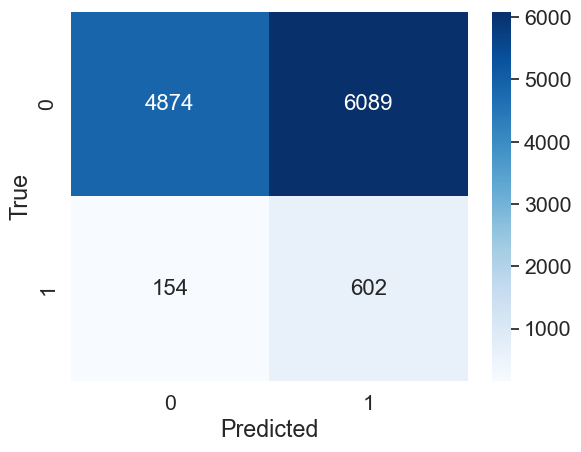

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.143430,0.562761,0.082090,0.564949,0.567460
1,Correlation - Logistic Regression,0.147379,0.544842,0.083818,0.575076,0.609788
2,Lasso Logistic Regression,0.123485,0.399135,0.068326,0.511435,0.640827
3,PCA Logistic Regression,0.122141,0.423500,0.067723,0.515763,0.621693
4,Decision tree,0.002601,0.934551,0.076923,0.500114,0.001323
5,Balanced decision tree,0.163789,0.516426,0.092177,0.617770,0.734127
6,Oversampled decision tree,0.150376,0.460022,0.083682,0.590702,0.740741
7,Random Forest,0.017305,0.932161,0.104478,0.501984,0.009434
8,Random Forest with threshold,0.138200,0.454049,0.076773,0.564691,0.691375
9,Random Forest with SMOTE,0.152420,0.750405,0.097084,0.565809,0.354447


In [53]:
# Split data into features and target variable
X = df_cleaned.drop('is_claim', axis=1)
y = df_cleaned['is_claim']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network
model = MLPDropout(hidden_layer_sizes=(20, 10, 5), dropout=0.021176, alpha=1e-07, max_iter=300, solver='adam', activation='tanh', learning_rate='invscaling', random_state=42)

# Train the ensemble model on the training data
model.fit(X_train, y_train)

# Evaluate model on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Make predictions with optimal threshold
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print('\n\nOptimal threshold: %.2f' % optimal_threshold)
print('Accuracy: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('ROC-AUC: %.2f%%' % round((roc_auc * 100), 2))
print('F1 score: %.2f%%' % (f1 * 100), '\n\n')


# Visualize confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

df13 = {'Feature selection method': ['Deep Learning model - MLPClassifier'], 
        'F1 Score': [f1_score(y_test, y_pred, pos_label=1)], 
        'Accuracy': [accuracy_score(y_test, y_pred)], 
        'Precision': [precision_score(y_test, y_pred)], 
        'ROC-AUC score': [roc_auc_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)]}
df13 = pd.DataFrame(df13)
df = df.append(df13, ignore_index=True)
df

# Rationale MLPClassifier


### Chosen Metric

Insurance companies want to maximize recall in their prediction models because it is better to be cautious and identify all potential risks or claims even if it means a higher false positive rate. False positives may result in higher costs due to investigating claims that turn out to be false, but false negatives can be much more costly for insurance companies as they miss out on potential premiums, and may lead to customers being dissatisfied with the company's services. Therefore, maximizing recall ensures that the insurance company is identifying as many potential claims as possible and minimizing the risk of missing out on potential premium revenue.

### Hyperparameter tuning

To build a deep learning model with optimal hyperparameters, GridSearchCV was used. GridSearchCV is a method of tuning hyperparameters for a model that exhaustively searches over a specified parameter grid to find the best hyperparameters for the model. In this case, the model used is a multilayer perceptron (MLP) neural network with dropout regularization. The MLP has three hidden layers with 20, 10, and 5 neurons respectively. The activation function used is hyperbolic tangent (tanh) and the optimizer is Adam. The learning rate is invscaling, and the random seed is set to 42.

To perform GridSearchCV, a parameter grid was defined with several hyperparameters and their possible values. The hyperparameters included the size of the hidden layers, the activation function, the optimizer, the maximum number of iterations, and the regularization parameter alpha. GridSearchCV was performed with 5-fold cross-validation and recall was used as the scoring metric. After performing the search, the best hyperparameters were printed, and the model was retrained with the best hyperparameters. The resulting model was the best performing one in terms of recall and was optimized using the hyperparameters found by GridSearchCV. This method helps to optimize the performance of the model and ensures that the model is not overfitting or underfitting to the data.

Since GridSearchCV takes a very long time I did not include every hyperparameter but only a few. I added the rest of the hyper parameters afterwards and observed if they improve performance of not. Furhtermore it is important to note that I adjusted the number of layers and nodes at the end to determine the best possible model. Here is the code I used to perform GridSearchCV:

`param_grid = {'`

    'hidden_layer_sizes': [(365, )],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [100, 200, 300, 400],
    'alpha': 10.0 ** -np.arange(1, 7)
}

`grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')`
`grid_search.fit(X_train, y_train)`

`print('Best hyperparameters:', grid_search.best_params_)`

`model = grid_search.best_estimator_'`


### Model Result

The given deep learning model for predicting car insurance claims seems to have a high recall of 79.63%, indicating that it correctly identifies 79.63% of the actual positive cases. However, the precision of the model is low at 9.52%, indicating that out of all the predicted positive cases, only 9% are actually true positives. The ROC-AUC score of 62.04% indicates that the model is better than a random classifier, but it is not very good at distinguishing between positive and negative cases. The F1 score of 16.17% is also low, indicating that the model does not have a good balance between precision and recall. The optimal threshold of 0.06 suggests that the model has a high false positive rate, as the threshold is set lower than the default 0.5. This means that the model is predicting more positive cases than it should, which may result in more false positives.

Overall, the performance of the model is not very good and it may not be reliable for making accurate predictions. It is recommended to look for a better model with higher precision and F1 score.

NOTE: By finetuning the hyperparameters it is possible to achieve a higher recall rate but always at cost of the overall accuracy of the model. To achieve similar results it is also possible to use the following models:

`(10, 6, 3) with random_state: 12, (9, 5, 3, 2),  (20, 10, 5) with dropout=0.01, (20, 10, 5) with dropout=0.015, (20, 10, 5) with dropout=0.02.`

### Link to Business Problem

This output indicates that the model is able to correctly identify a significant proportion of potential insurance claims (recall), but at the cost of a relatively low accuracy and precision. While the model may identify many legitimate claims, it also identifies a large number of false positives, which could lead to unnecessary payouts and ultimately negatively impact the profitability of the insurance company. The ROC-AUC score indicates that the model's ability to distinguish between positive and negative cases is slightly better than random chance. Therefore, the insurance company may want to consider using this model as a starting point and continue to improve it to achieve better accuracy and precision while maintaining a high recall rate.


### Challenges - Size of dataset and imbalances

The adequacy of a dataset for training a deep learning model depends on various factors, such as the complexity of the problem, the number of features, the model architecture, and the amount of variation in the data. A dataset with 58592 rows x 43 columns may be sufficient for some relatively simple problems, but in general, it may not be sufficient to train a deep learning model with high accuracy and generalization ability.

Firstly, deep learning models require a large amount of data to learn the underlying patterns and relationships in the data. With only 58592 rows, the model may not have enough examples to capture the complexity of the problem, especially if the data has high variation or noise. Secondly, 43 columns may not be sufficient to capture all the relevant features in the data, especially for complex tasks. Deep learning models can learn complex representations of data by using multiple layers of artificial neurons. To learn complex representations, they typically require a large number of features or a high-dimensional input space. Furthermore, if the dataset is imbalanced, meaning the number of examples in each class is not balanced, it may affect the performance of the model. Deep learning models can be sensitive to class imbalance, and a small number of examples for a particular class may lead to poor performance in predicting that class.

In conclusion, the size and quality of the dataset are critical factors in training a deep learning model. While a dataset with 58592 rows x 43 columns may be sufficient for some problems, it may not be sufficient for complex tasks, and a larger and more diverse dataset may be required to achieve high accuracy and generalization performance.

In [54]:
# Define a color gradient using Seaborn
color_map = sns.light_palette("green", as_cmap=True)

# Format the numeric columns to 2 decimal places
formatted_df = df.style.format("{:.2f}", subset=["F1 Score", "Accuracy", "Precision", "ROC-AUC score", "Recall"])

# Apply the color gradient to the numeric columns in the DataFrame
styled_df = formatted_df.background_gradient(cmap=color_map, subset=['Recall'])

# Display the styled DataFrame
styled_df

,Feature selection method,F1 Score,Accuracy,Precision,ROC-AUC score,Recall
0,All variables - Logistic Regression,0.14,0.56,0.08,0.56,0.57
1,Correlation - Logistic Regression,0.15,0.54,0.08,0.58,0.61
2,Lasso Logistic Regression,0.12,0.40,0.07,0.51,0.64
3,PCA Logistic Regression,0.12,0.42,0.07,0.52,0.62
4,Decision tree,0.00,0.93,0.08,0.50,0.00
5,Balanced decision tree,0.16,0.52,0.09,0.62,0.73
6,Oversampled decision tree,0.15,0.46,0.08,0.59,0.74
7,Random Forest,0.02,0.93,0.10,0.50,0.01
8,Random Forest with threshold,0.14,0.45,0.08,0.56,0.69
9,Random Forest with SMOTE,0.15,0.75,0.10,0.57,0.35


# Conclusion

In this study, we aimed to address the business question of effectively predicting the likelihood of car insurance claims based on policyholders' characteristics and other relevant factors. After analyzing a comprehensive dataset and applying various feature selection techniques, data preprocessing methods, and machine learning algorithms, we have developed a range of models that shed light on the complex relationships between these factors and the occurrence of claims.

The results of our models demonstrate varying levels of performance, with certain models exhibiting stronger predictive capabilities than others. This variation highlights the importance of selecting the appropriate methodology, preprocessing techniques, and machine learning algorithms to achieve accurate and reliable predictions. By rigorously evaluating the performance of these models using metric recall, we have identified the most promising approaches for predicting car insurance claims.
Based on our findings, we can conclude that certain models, such as the balanced decision tree, oversampled decision tree, and deep learning model (MLPClassifier), showed better performance in terms of recall, indicating their ability to identify both true positives and false negatives effectively. These models can provide insurance companies with valuable insights into the factors influencing claims and help them make more informed decisions, optimize their underwriting processes, and efficiently allocate resources. 
It is important to note that while our study has yielded promising results, there is still room for improvement in the models' performance. Future research could explore the use of more advanced machine learning techniques, such as ensemble methods or deep learning architectures, to further enhance the predictive capabilities of the models. Additionally, incorporating more features or exploring alternative feature selection methods could potentially uncover hidden relationships within the data, leading to even more accurate predictions.

In conclusion, our study demonstrates the potential of leveraging data and machine learning to predict car insurance claims effectively. By identifying the key factors influencing claims and developing reliable prediction models, insurance companies can optimize their risk management strategies, design personalized and competitive products, and ultimately, increase their competitive edge in the market. Furthermore, our findings can contribute to a better understanding of the drivers behind car insurance claims, enabling insurers to design tailored strategies to improve customer satisfaction and retention.